# Customer Behaviour Analysis

# Objective
In this case study, you will be working on E-commerce Customer Behavior Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale e-commerce datasets using PySpark. You will apply techniques learned in data analytics to clean, transform, and explore customer behavior data, drawing meaningful insights to support business decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing customer segmentation, purchase patterns, and behavioral trends.

# Business Value
E-commerce businesses operate in a highly competitive market where understanding customer behavior is critical to driving growth and retention. To stay ahead, companies must leverage data-driven insights to optimize marketing strategies, personalize customer experiences, and improve product offerings. In this assignment, you will analyze e-commerce transaction data to uncover patterns in purchasing behavior, customer preferences, and sales performance. With Apache Spark's ability to handle large datasets efficiently, businesses can process vast amounts of customer interactions in real-time, helping them make faster and more informed decisions.
As an analyst at an e-commerce company, your task is to examine historical transaction records and customer survey data to derive actionable insights that can drive business growth. Your analysis will help identify high-value customers, segment users based on behavior, and uncover trends in product demand and customer engagement. By leveraging big data analytics, businesses can enhance customer satisfaction, improve retention rates, and maximize revenue opportunities.


# Assignment Tasks
1. Data Preparation
2. Data Cleaning
3. Exploratory Data Analysis
4. Customer Segmentation (RFM Analysis) and Business Insights
5. Evaluation and Conclusion


# Dataset Overview
The dataset can be accessed the following [link](https://drive.google.com/drive/folders/1mBgC5tvZrh1bIBvpXVP_j-au5LFUAwOZ?usp=sharing).

The dataset used in this analysis comprises longitudinal purchase records from 5,027 Amazon.com users in the United States, spanning 2018 to 2022.

It is structured into three CSV files (amazon-purchases.csv, survey.csv, and fields.csv) that capture transactional data, demographic profiles, and survey responses.

Collected with informed consent, the dataset enables analysis of customer behavior, product preferences, and demographic trends.

**NOTE**: Personal identifiers (PII) were removed to ensure privacy, and all data were preprocessed by users before submission.

`Data Dictionary:`

| **Attribute**          | **Description** |
|------------------------|----------------|
| **Order Dates**        | The specific dates when orders were placed, enabling chronological analysis of sales trends. |
| **Title** |The name of the product purchased. |
|**Category** | The classification or group to which the product belongs, facilitating category-wise analysis. |
| **Pricing** | The cost per unit of each product, essential for revenue calculations and pricing strategy assessments. |
| **Quantities** | The number of units of each product ordered in a transaction, aiding in inventory and demand analysis. |
| **Shipping States**    | The states to which products were shipped, useful for geographical sales distribution analysis. |
| **Survey ResponseID**  | A unique identifier linking purchases to customer survey responses, enabling correlation between purchasing behavior and customer feedback. |



# Loading the Datasets

In [ ]:
## Installing the libraries if required
#!pip install --quiet pyspark==3.5.4 datasets==3.3.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 numpy==1.26.4 tqdm==4.67.1

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Initialise Spark session
spark = SparkSession.builder \
    .appName("Customer Behavior Analysis") \
    .getOrCreate()


# Load the paths to the datasets/csv files
amazon_purchases_path = "/content/amazon-purchases.csv"

survey_path = "/content/survey.csv"
fields_path = "/content/fields.csv"

# Load datasets into PySpark DataFrames
amazon_purchases = spark.read.csv(amazon_purchases_path, header=True, inferSchema=True)
survey = spark.read.csv(survey_path, header=True, inferSchema=True)
fields = spark.read.csv(fields_path, header=True, inferSchema=True)

# Merge the datasets
merged_data = amazon_purchases.join(survey, on='Survey ResponseID', how='inner')

# Display the merged data
merged_data.show()

+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+--------------------+-------------+----------------+--------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|            Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-us

#1. Data Preparation

Before analysis, the data needs to be prepared to ensure consistency and efficiency.
- Check for data consistency and ensure all columns are correctly formatted.
- Structure and prepare the dataset for further processing, ensuring that relevant features are retained


In [ ]:
from pyspark.sql.functions import sum as spark_sum, col

# Check for missing values in the merged dataset
missing_values = merged_data.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in merged_data.columns])

missing_values.show()

+-----------------+----------+-----------------------+--------+----------------------+-----+------------------------+--------+-----------+----------------+------------+-----------------+--------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|Title|ASIN/ISBN (Product Code)|Category|Q-demos-age|Q-demos-hispanic|Q-demos-race|Q-demos-education|Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-personal-diabetes|Q-personal-wheelchair|Q-life-changes|Q-sell-YOUR-data|

#2. Data Cleaning <font color = red>[20 marks]</font> <br>

Prepare the data for further analysis by performing data cleaning such as missing value treatment, handle data schema, outlier analysis, and relevant feature engineering techniques.

## 2.1 Handling Missing values <font color = red>[10 marks]</font> <br>
Handle missing values in the data

In [ ]:
# Import necessary functions
from pyspark.sql.functions import when, count, col

# Fill missing (null) values with the appropriate techniques as required by the analysis

# Aggregate and count missing values (nulls) for each column after replacement

# Display the count of remaining missing values in each column

In [ ]:
# Fill missing 'Shipping Address State' with 'Unknown'
merged_data = merged_data.na.fill({'Shipping Address State': 'Unknown'})

# Fill missing 'Title', 'ASIN/ISBN (Product Code)', and 'Category' with 'Unknown'
merged_data = merged_data.na.fill({'Title': 'Unknown', 'ASIN/ISBN (Product Code)': 'Unknown', 'Category': 'Unknown'})

# Fill missing 'Q-life-changes' with 'No' (assuming no life changes if not reported)
merged_data = merged_data.na.fill({'Q-life-changes': 'No'})

# Aggregate and count missing values (nulls) for each column after replacement
missing_values_after_cleaning = merged_data.select([count(when(col(c).isNull(), c)).alias(c) for c in merged_data.columns])

# Display the count of remaining missing values in each column
missing_values_after_cleaning.show()

+-----------------+----------+-----------------------+--------+----------------------+-----+------------------------+--------+-----------+----------------+------------+-----------------+--------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|Title|ASIN/ISBN (Product Code)|Category|Q-demos-age|Q-demos-hispanic|Q-demos-race|Q-demos-education|Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-personal-diabetes|Q-personal-wheelchair|Q-life-changes|Q-sell-YOUR-data|

## 2.2 Feature Engineering <font color = red>[5 marks]</font> <br>
Perform feature engineering on the dataset to extract relevant/ create new features as required and map specific data types.

In [ ]:
from pyspark.sql.functions import col, month, year, to_date

# Perform appropriate feature engineering. Eg. Extract order date, month, year and cast to the appropriate values
merged_data = (
    merged_data
      .withColumn('Order Date', to_date(col('Order Date'), "yyyy-MM-dd"))
      .withColumn('Order Month', month(col('Order Date')))
      .withColumn('Order Year', year(col('Order Date')))
)

# Display the updated dataset
merged_data.show()

+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+--------------------+-------------+----------------+--------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+-----------+----------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|            Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-m

In [ ]:
from pyspark.sql.functions import create_map, lit
from itertools import chain

# Map categorical income to numerical values
income_mapping = {
    'Less than $25,000': 0,
    '$25,000 - $49,999': 1,
    '$50,000 - $74,999': 2,
    '$75,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000 or more': 5
}
mapping_expr_income = create_map([lit(x) for x in chain(*income_mapping.items())])
merged_data = merged_data.withColumn('Income_Numeric', mapping_expr_income[col('Q-demos-income')])

# Map gender to numerical values
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Other': 2,
    'Prefer not to say': 3
}
mapping_expr_gender = create_map([lit(x) for x in chain(*gender_mapping.items())])
merged_data = merged_data.withColumn('Gender_Numeric', mapping_expr_gender[col('Q-demos-gender')])


# Display the updated dataset
merged_data.show()

+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+--------------------+-------------+----------------+--------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+-----------+----------+--------------+--------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|            Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-us

## 2.3 Data Cleaning <font color = red>[5 marks]</font> <br>
Handle data cleaning techniques such as data duplication, dropping unnecessary values etc.

In [ ]:
# Check for duplicates
print("Number of Duplicates:", merged_data.count() - merged_data.dropDuplicates().count())

# Remove duplicates
merged_data = merged_data.dropDuplicates()

# Verify duplicates after cleaning
print("Number of Duplicates After Cleaning:", merged_data.count() - merged_data.dropDuplicates().count())

Number of Duplicates: 11516
Number of Duplicates After Cleaning: 0


In [ ]:
cleaned_data_path = "/content/cleaned_customer_data" # Save the cleaned dataset locally
merged_data.write.csv(cleaned_data_path, header=True, mode='overwrite')

# Load the cleaned dataset from the location
cleaned_data = spark.read.csv(cleaned_data_path, header=True, inferSchema=True)

# Display the first few rows
print("Cleaned Data:")
cleaned_data.show(5)

Cleaned Data:
+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+-----------------+-------------+----------------+------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+-----------+----------+--------------+--------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|         Category|  Q-demos-age|Q-demos-hispanic|      Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substanc

# 3. Exploratory Data Analysis <font color = red>[55 marks]</font> <br>

## 3.1 Analyse purchases by hour, day and month <font color = red>[5 marks]</font> <br>

Examine overall trends in purchases over time and analyse the trends by hour, day, month.

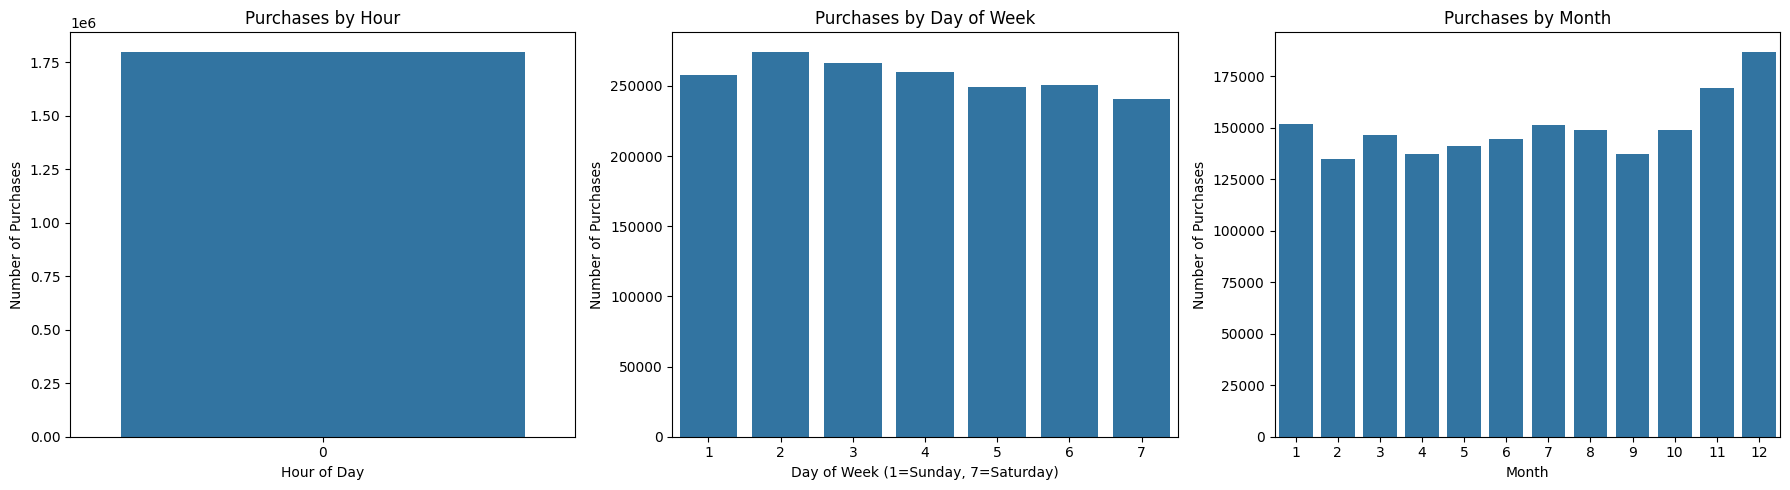

In [ ]:
# Purchase Distribution by Hour, Day, and Month

from pyspark.sql.functions import hour, dayofweek, month
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour, day, and month
purchase_time_data = merged_data.withColumn("PurchaseHour", hour("Order Date"))
purchase_time_data = purchase_time_data.withColumn("PurchaseDay", dayofweek("Order Date"))
purchase_time_data = purchase_time_data.withColumn("PurchaseMonth", month("Order Date"))

# Group and count purchases by time factors
purchases_by_hour = purchase_time_data.groupBy("PurchaseHour").count().orderBy("PurchaseHour")
purchases_by_day = purchase_time_data.groupBy("PurchaseDay").count().orderBy("PurchaseDay")
purchases_by_month = purchase_time_data.groupBy("PurchaseMonth").count().orderBy("PurchaseMonth")

# Convert to Pandas for visualisation
purchases_by_hour_pd = purchases_by_hour.toPandas()
purchases_by_day_pd = purchases_by_day.toPandas()
purchases_by_month_pd = purchases_by_month.toPandas()

# Plot the data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='PurchaseHour', y='count', data=purchases_by_hour_pd, ax=axes[0])
axes[0].set_title('Purchases by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Purchases')

sns.barplot(x='PurchaseDay', y='count', data=purchases_by_day_pd, ax=axes[1])
axes[1].set_title('Purchases by Day of Week')
axes[1].set_xlabel('Day of Week (1=Sunday, 7=Saturday)')
axes[1].set_ylabel('Number of Purchases')

sns.barplot(x='PurchaseMonth', y='count', data=purchases_by_month_pd, ax=axes[2])
axes[2].set_title('Purchases by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Purchases')

plt.tight_layout()
plt.show()

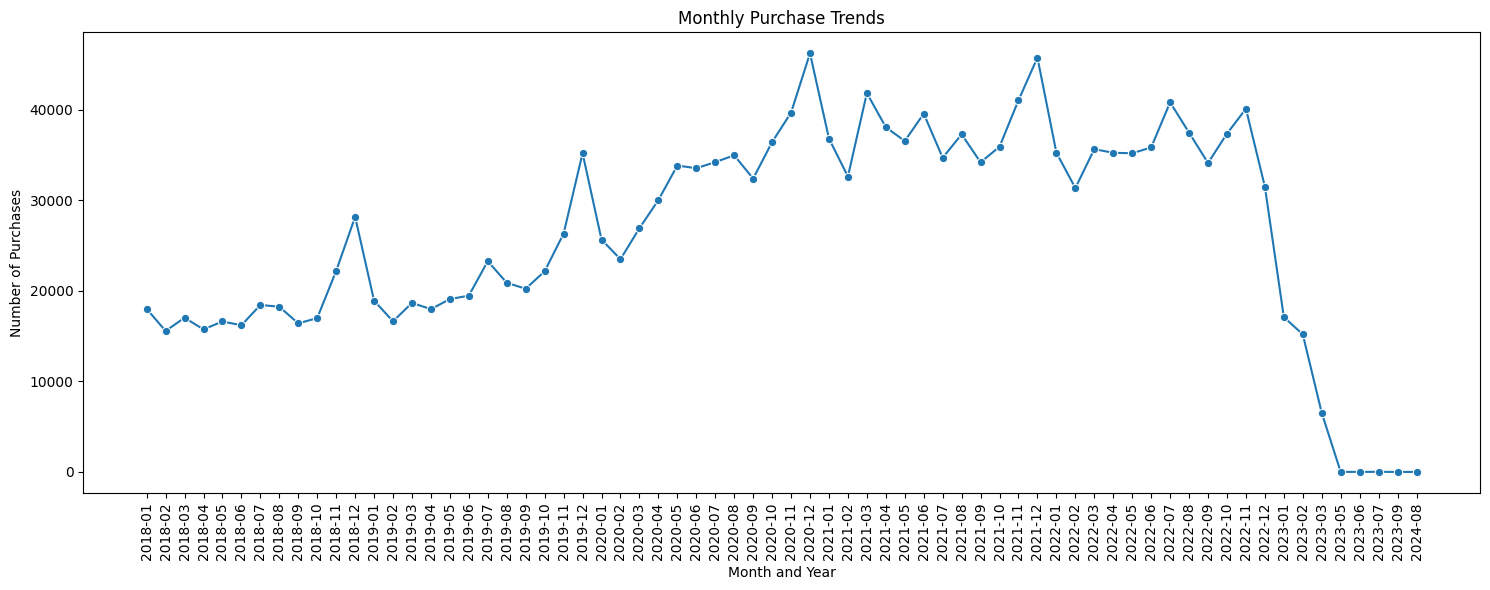

In [ ]:
# Monthly Purchase Trends

from pyspark.sql.functions import date_format

# Extract month and year from 'Order Date'
monthly_purchase_data = merged_data.withColumn("MonthYear", date_format("Order Date", "yyyy-MM"))

# Group by month and count purchases
monthly_purchases = monthly_purchase_data.groupBy("MonthYear").count().orderBy("MonthYear")

# Convert to Pandas for visualisation
monthly_purchases_pd = monthly_purchases.toPandas()

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='MonthYear', y='count', data=monthly_purchases_pd, marker='o')
plt.title('Monthly Purchase Trends')
plt.xlabel('Month and Year')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

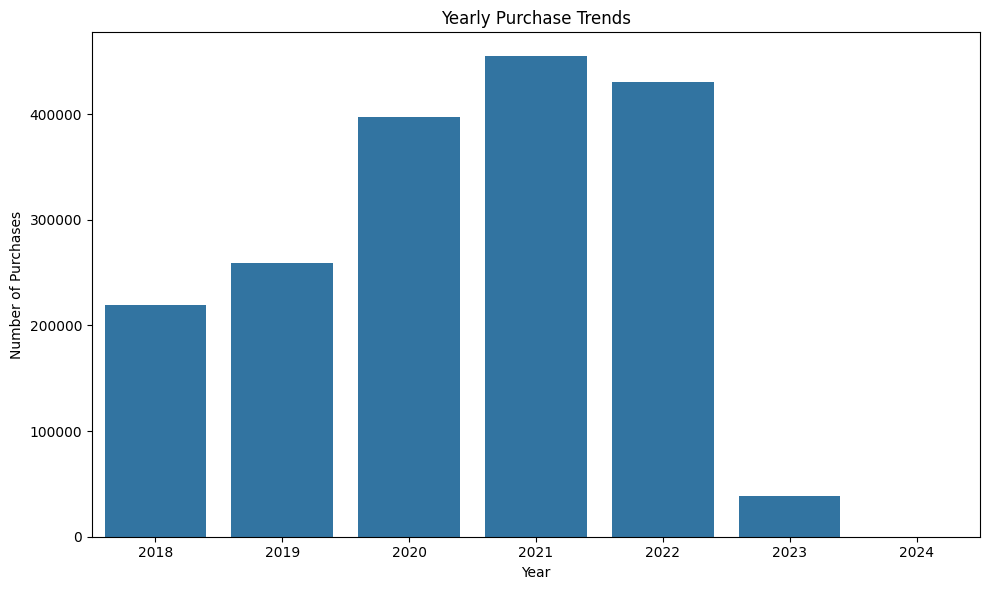

In [ ]:
# Yealy Purchase Trends

from pyspark.sql.functions import date_format, year

# Group by Year and count purchases
yearly_purchases = merged_data.groupBy(year("Order Date").alias("OrderYear")).count().orderBy("OrderYear")


# Convert to Pandas for visualisation
yearly_purchases_pd = yearly_purchases.toPandas()


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='OrderYear', y='count', data=yearly_purchases_pd)
plt.title('Yearly Purchase Trends')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

## 3.2 Customer Demographics vs Purchase Frequency <font color = red>[5 marks]</font> <br>
Analyse the trends between the customer deographics and the purchase frequency

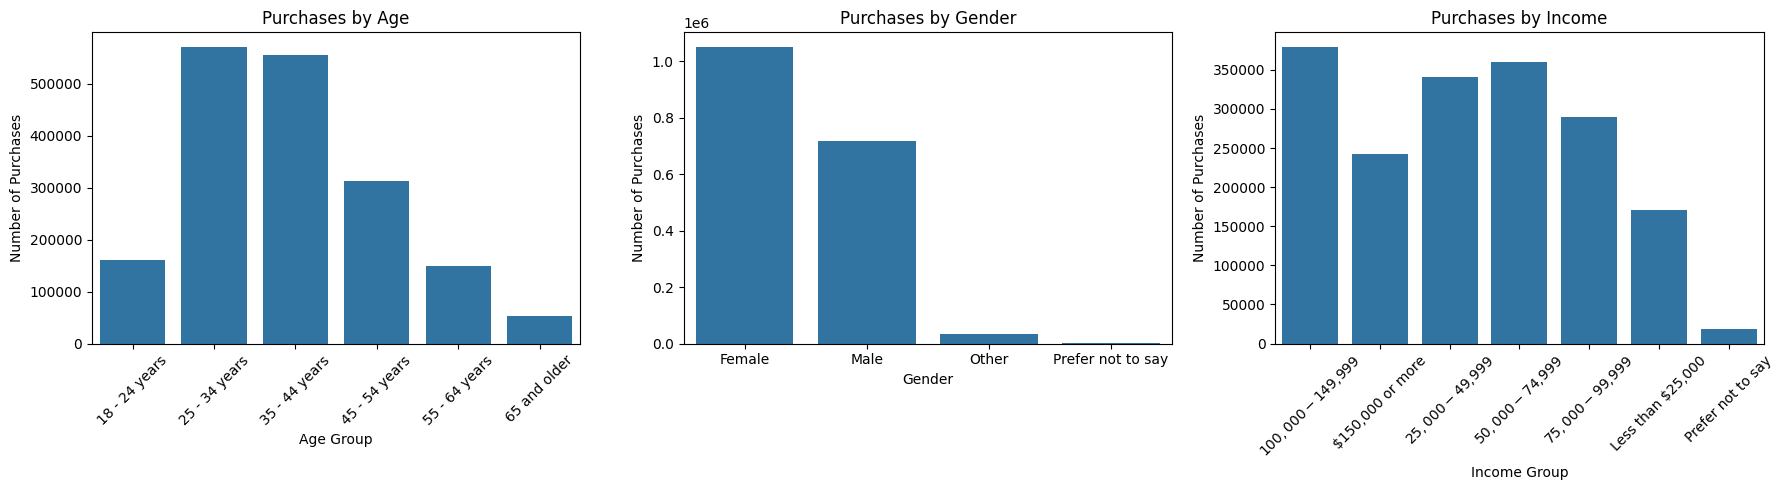

In [ ]:
# Correlation Between Demographics and Purchase Frequency

from pyspark.sql.functions import count

# Group by demographic attributes and count purchases
purchases_by_age = merged_data.groupBy("Q-demos-age").count().orderBy("Q-demos-age")
purchases_by_gender = merged_data.groupBy("Q-demos-gender").count().orderBy("Q-demos-gender")
purchases_by_income = merged_data.groupBy("Q-demos-income").count().orderBy("Q-demos-income")


# Convert to Pandas for visualisation
purchases_by_age_pd = purchases_by_age.toPandas()
purchases_by_gender_pd = purchases_by_gender.toPandas()
purchases_by_income_pd = purchases_by_income.toPandas()


# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Q-demos-age', y='count', data=purchases_by_age_pd, ax=axes[0])
axes[0].set_title('Purchases by Age')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Purchases')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Q-demos-gender', y='count', data=purchases_by_gender_pd, ax=axes[1])
axes[1].set_title('Purchases by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of Purchases')

sns.barplot(x='Q-demos-income', y='count', data=purchases_by_income_pd, ax=axes[2])
axes[2].set_title('Purchases by Income')
axes[2].set_xlabel('Income Group')
axes[2].set_ylabel('Number of Purchases')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## 3.3 Purchase behavior weekend vs weekday <font color = red>[5 marks]</font> <br>

Compare the purchase behavior of customer's on weekdays vs. weekends.

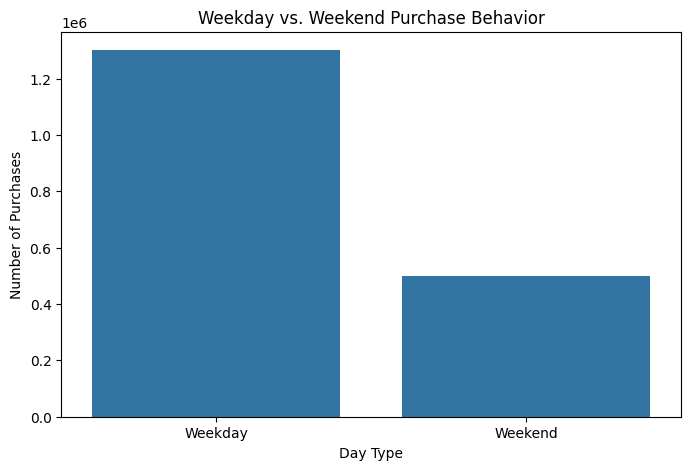

In [ ]:
# Weekday vs. Weekend Purchase Behavior

from pyspark.sql.functions import when

# Define weekdays and weekends
weekday_weekend_data = merged_data.withColumn("DayType",
    when(dayofweek("Order Date").isin([1, 7]), "Weekend").otherwise("Weekday")
)

# Group and count purchases
purchases_by_daytype = weekday_weekend_data.groupBy("DayType").count()

# Convert to Pandas for visualisation
purchases_by_daytype_pd = purchases_by_daytype.toPandas()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='DayType', y='count', data=purchases_by_daytype_pd)
plt.title('Weekday vs. Weekend Purchase Behavior')
plt.xlabel('Day Type')
plt.ylabel('Number of Purchases')
plt.show()

## 3.4 Frequently purchased product pairs <font color = red>[5 marks]</font> <br>

Analyze how frequently products are purchased together (also known as Market Basket Analysis)


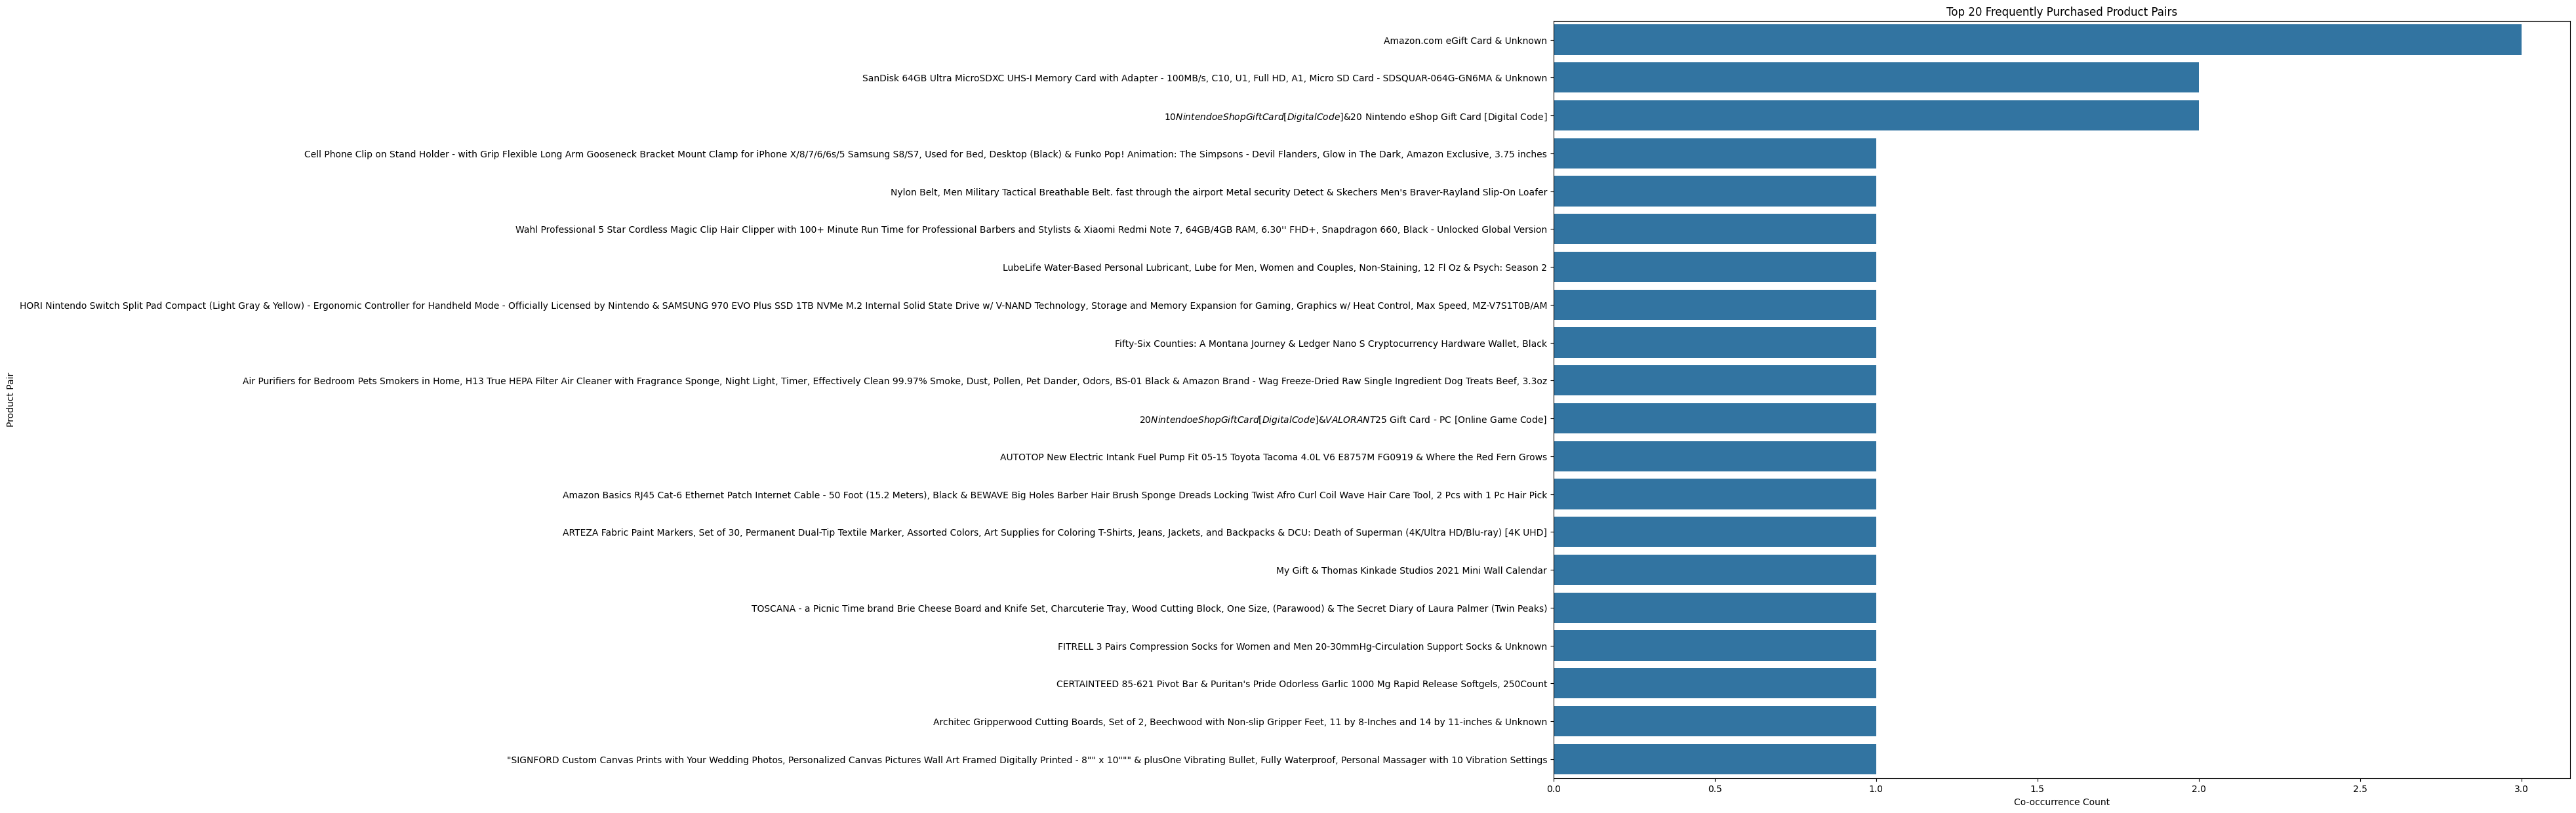

In [ ]:
# Frequently Purchased Product Pairs (Market Basket Analysis)
from pyspark.sql.functions import collect_set, explode, size
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import udf
from itertools import combinations


# Group purchases by customer and collect items bought together
customer_baskets = merged_data.groupBy("Survey ResponseID").agg(collect_set("Title").alias("Items"))

filtered_baskets = customer_baskets.filter(size(col("Items")) <= 10)

# Explode item pairs
def generate_pairs(items):
    return [f"{a} & {b}" for a, b in combinations(sorted(items), 2)]

pair_udf = udf(generate_pairs, ArrayType(StringType()))
item_pairs = filtered_baskets.withColumn("ItemPairs", pair_udf("Items")).select("Survey ResponseID", explode("ItemPairs").alias("ItemPair"))

# Count co-occurrences of item pairs
pair_counts = item_pairs.groupBy("ItemPair").count().orderBy("count", ascending=False)

# Convert to Pandas for visualisationas
top_pairs = pair_counts.limit(20).cache()
top_pairs_pd = top_pairs.toPandas()

# Plot
plt.figure(figsize=(20, 15))  # Wider canvas
sns.barplot(y='ItemPair', x='count', data=top_pairs_pd)
plt.title('Top 20 Frequently Purchased Product Pairs')
plt.xlabel('Co-occurrence Count')
plt.ylabel('Product Pair')
plt.show()

## 3.5 Examine Product Performance <font color = red>[5 marks]</font> <br>

Examine the performance of products by calculating revenue and item popularity.

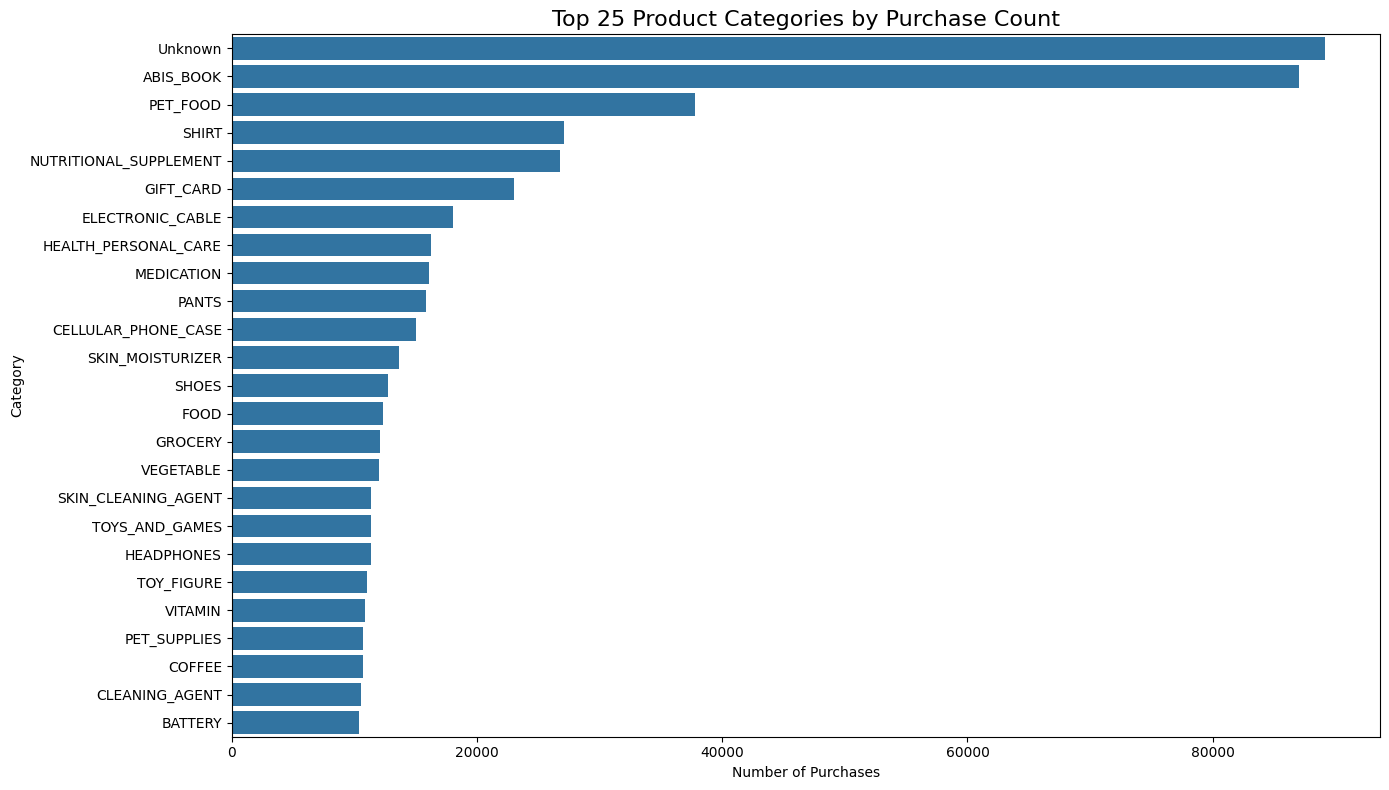

In [ ]:
# Contribution of Product Categories (Top 25)
category_counts = merged_data.groupBy("Category") \
    .count() \
    .orderBy(col("count").desc())

top_categories = category_counts.limit(25)

# Convert to Pandas for visualization
top_categories_pd = top_categories.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(y="Category", x="count", data=top_categories_pd)
plt.title("Top 25 Product Categories by Purchase Count", fontsize=16)
plt.xlabel("Number of Purchases")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

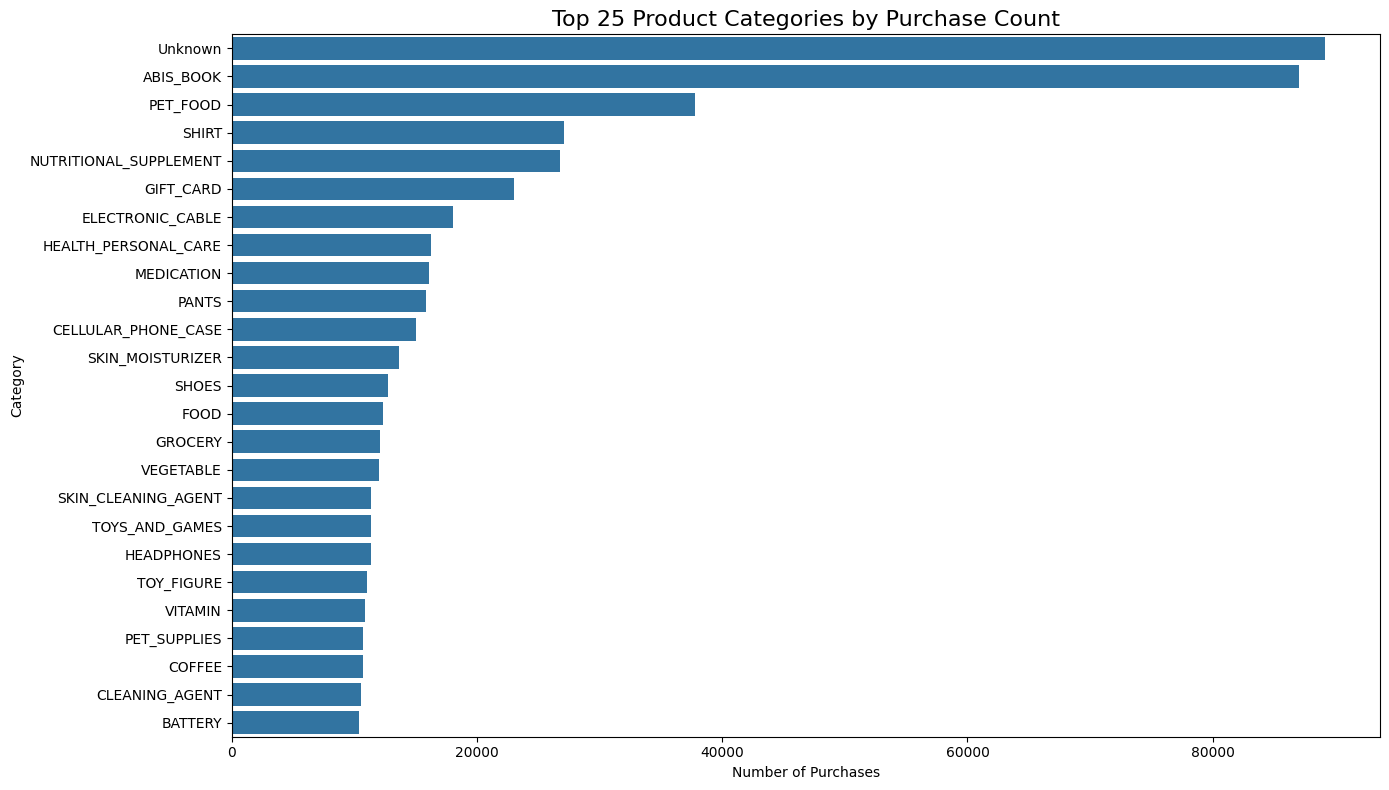

In [ ]:
# Contribution of Product Categories (Top 25)
category_counts = merged_data.groupBy("Category") \
    .count() \
    .orderBy(col("count").desc())

top_categories = category_counts.limit(25)

# Convert to Pandas for visualization
top_categories_pd = top_categories.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(y="Category", x="count", data=top_categories_pd)
plt.title("Top 25 Product Categories by Purchase Count", fontsize=16)
plt.xlabel("Number of Purchases")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

## 3.6 Top products by quantity <font color = red>[5 marks]</font> <br>

Identify the most frequently purchased products.

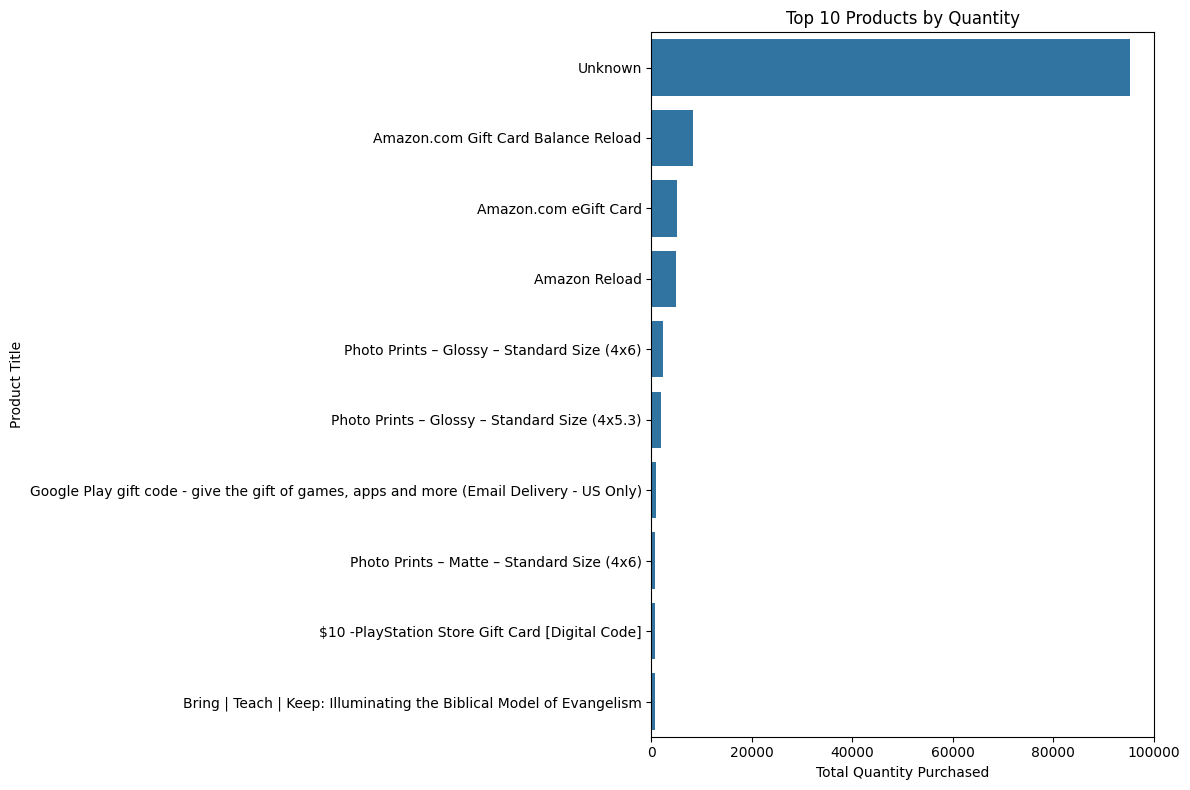

In [ ]:
# Top 10 Products by Quantity

from pyspark.sql.functions import sum as spark_sum

# Group by product title and sum 'Quantity'
product_quantity = merged_data.groupBy("Title") \
    .agg(spark_sum("Quantity").alias("TotalQuantity")) \
    .orderBy(col("TotalQuantity").desc())

# Convert to Pandas for visualisation
top_10_products_pd = product_quantity.limit(10).toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalQuantity', y='Title', data=top_10_products_pd)
plt.title('Top 10 Products by Quantity')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Product Title')
plt.tight_layout()
plt.show()

## 3.7 Distribution of Purchases by State <font color = red>[5 marks]</font> <br>

Analyze the distribution of purchases across states and categories.

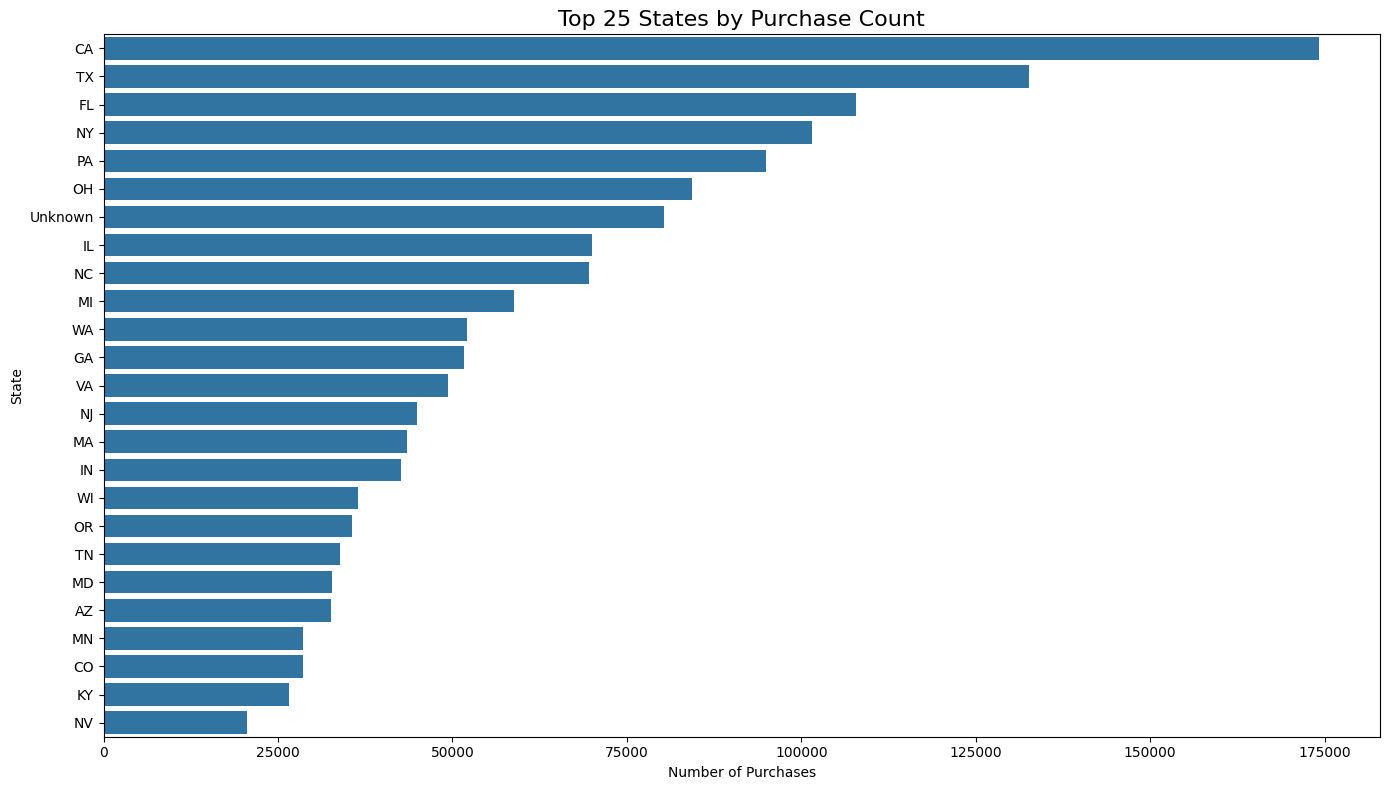

In [ ]:
# Distribution of Purchases by State (Top 25)

state_purchase_counts = merged_data.groupBy("Shipping Address State") \
    .count() \
    .orderBy(col("count").desc())

# Convert to Pandas for visualisation
top_25_states_pd = state_purchase_counts.limit(25).toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(y="Shipping Address State", x="count", data=top_25_states_pd)
plt.title("Top 25 States by Purchase Count", fontsize=16)
plt.xlabel("Number of Purchases")
plt.ylabel("State")
plt.tight_layout()
plt.show()

## 3.8 Price vs Product Quantity <font color = red>[5 marks]</font> <br>

Identify the Relationship between Price and Quantity

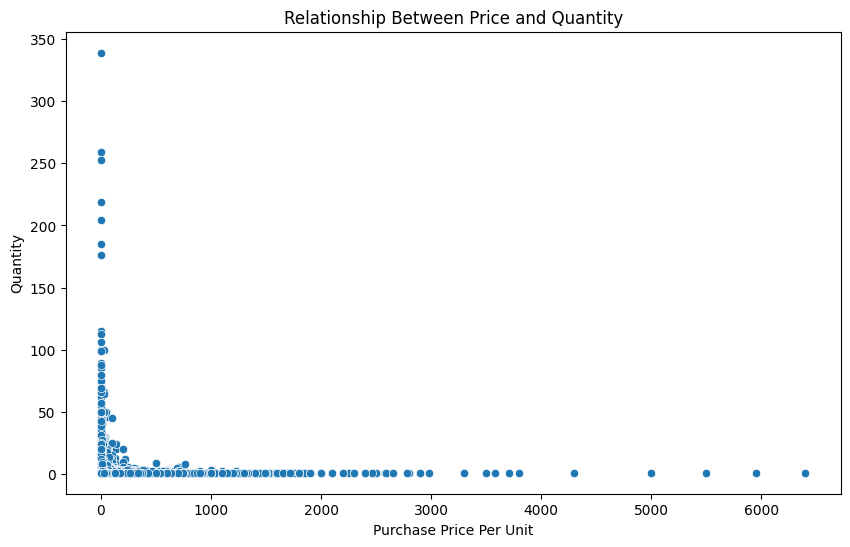

In [ ]:
# Relationship Between Price and Quantity

price_quantity_df = merged_data.select("Purchase Price Per Unit", "Quantity")

# Convert to Pandas for visualisation
price_quantity_pd = price_quantity_df.toPandas()


# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Price Per Unit', y='Quantity', data=price_quantity_pd)
plt.title('Relationship Between Price and Quantity')
plt.xlabel('Purchase Price Per Unit')
plt.ylabel('Quantity')
plt.show()

## 3.9 Analyse the spending KPIs <font color = red>[5 marks]</font> <br>


A popular KPI is average spend per customer. Calculate this metric as the ratio of total transaction amount from non-recurring payments divided by the total number of customers who made a purchase

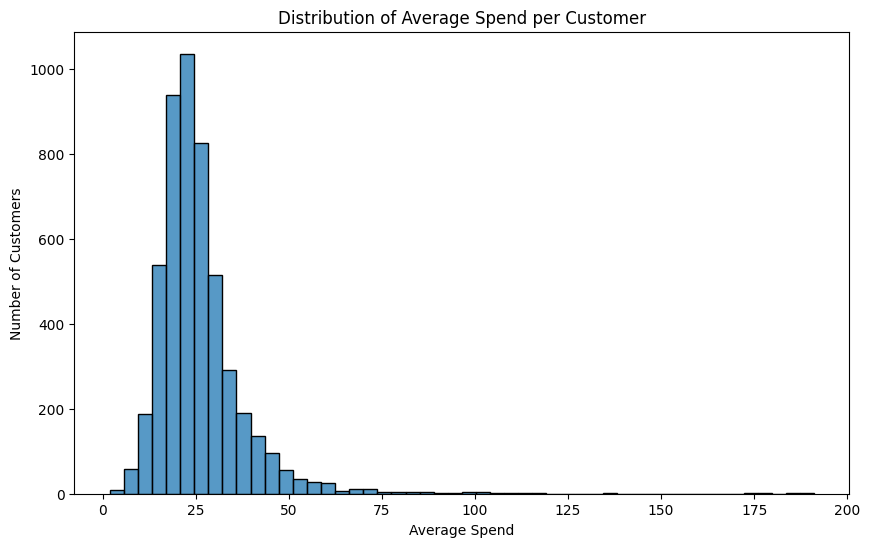

In [ ]:
# Average Spend per Customer

from pyspark.sql.functions import avg

# Group by customer and calculate average spend
average_spend_per_customer = merged_data.groupBy("Survey ResponseID") \
    .agg(avg(col("Purchase Price Per Unit") * col("Quantity")).alias("AverageSpend"))

# Convert to Pandas for visualisation
average_spend_per_customer_pd = average_spend_per_customer.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(average_spend_per_customer_pd['AverageSpend'], bins=50)
plt.title('Distribution of Average Spend per Customer')
plt.xlabel('Average Spend')
plt.ylabel('Number of Customers')
plt.show()

Analyse the Repeat Purchase Behavior of Customers

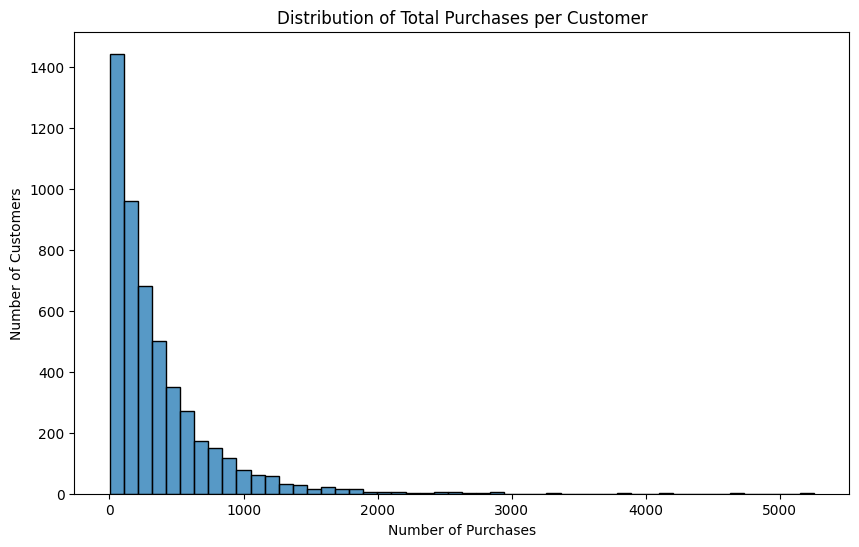

In [ ]:
# Repeat Purchase Analysis Behavior Per Customers

purchase_counts = merged_data.groupBy("Survey ResponseID").agg(count("*").alias("TotalPurchases"))

# Convert to Pandas for visualisation
purchase_counts_pd = purchase_counts.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(purchase_counts_pd['TotalPurchases'], bins=50)
plt.title('Distribution of Total Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

Analyse the top 10 high-engagement customers

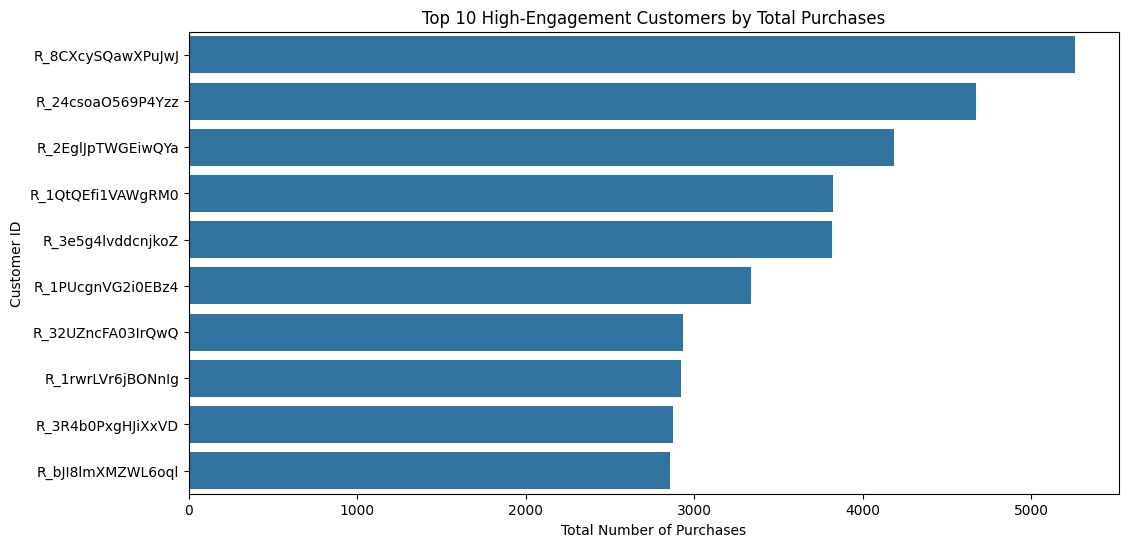

In [ ]:
# Top 10 High-Engagement Customers

from pyspark.sql.functions import desc

top_10_customers = purchase_counts.orderBy(desc("TotalPurchases")).limit(10)

# Convert to Pandas for visualisation
top_10_customers_pd = top_10_customers.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPurchases', y='Survey ResponseID', data=top_10_customers_pd)
plt.title('Top 10 High-Engagement Customers by Total Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Customer ID')
plt.show()

## 3.10 Seasonal trends in product purchases and their impact on revenues <font color = red>[5 marks]</font> <br>

Investigate the seasonal trends in product purchases and their impact on the overall revenue.

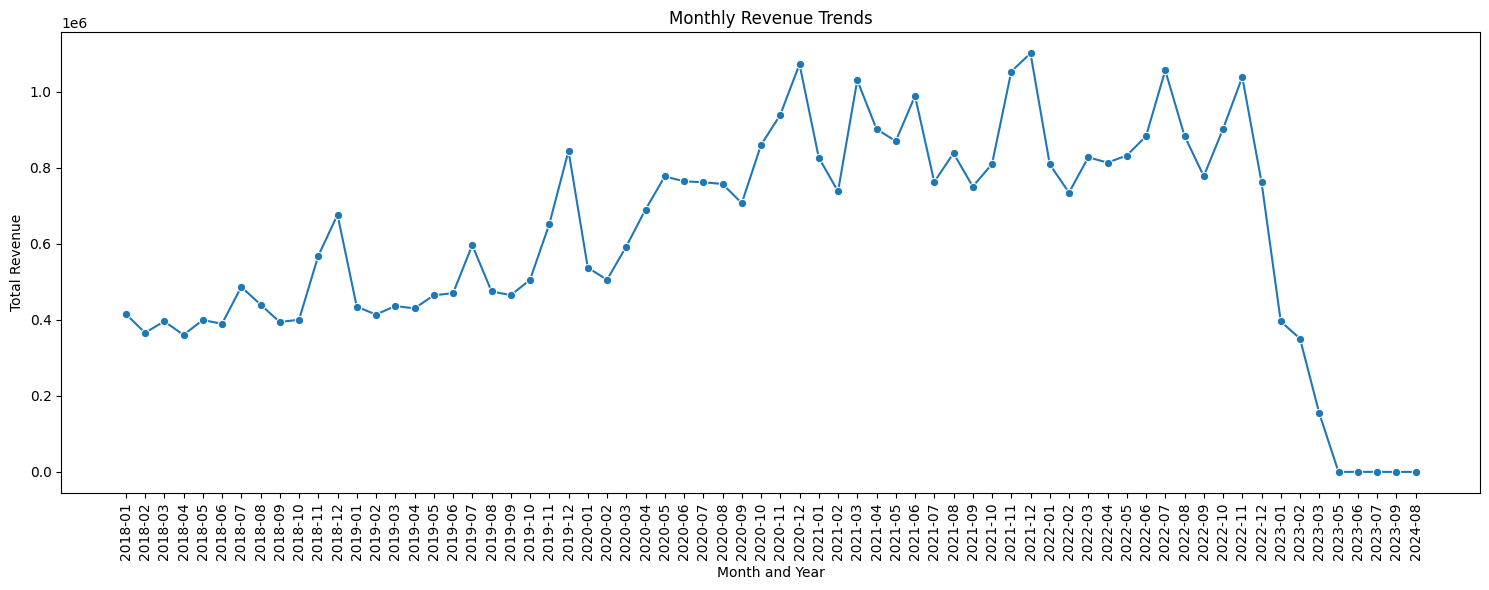

In [ ]:
# Seasonal Trends in Product Purchases and Their Impact on Revenue

from pyspark.sql.functions import year, month, sum

# Extract year and month
seasonal_revenue_data = merged_data.withColumn("MonthYear", date_format("Order Date", "yyyy-MM"))
seasonal_revenue_data = seasonal_revenue_data.withColumn("Revenue", col("Purchase Price Per Unit") * col("Quantity"))


# Group by year and month, summing total revenue
monthly_revenue = seasonal_revenue_data.groupBy("MonthYear").agg(sum("Revenue").alias("TotalRevenue")).orderBy("MonthYear")


# Convert to Pandas for visualisation
monthly_revenue_pd = monthly_revenue.toPandas()


# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='MonthYear', y='TotalRevenue', data=monthly_revenue_pd, marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month and Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3.11 Customer location vs purchasing behavior <font color = red>[5 marks]</font> <br>

Examine the relationship between customer's location and their purchasing behaviors

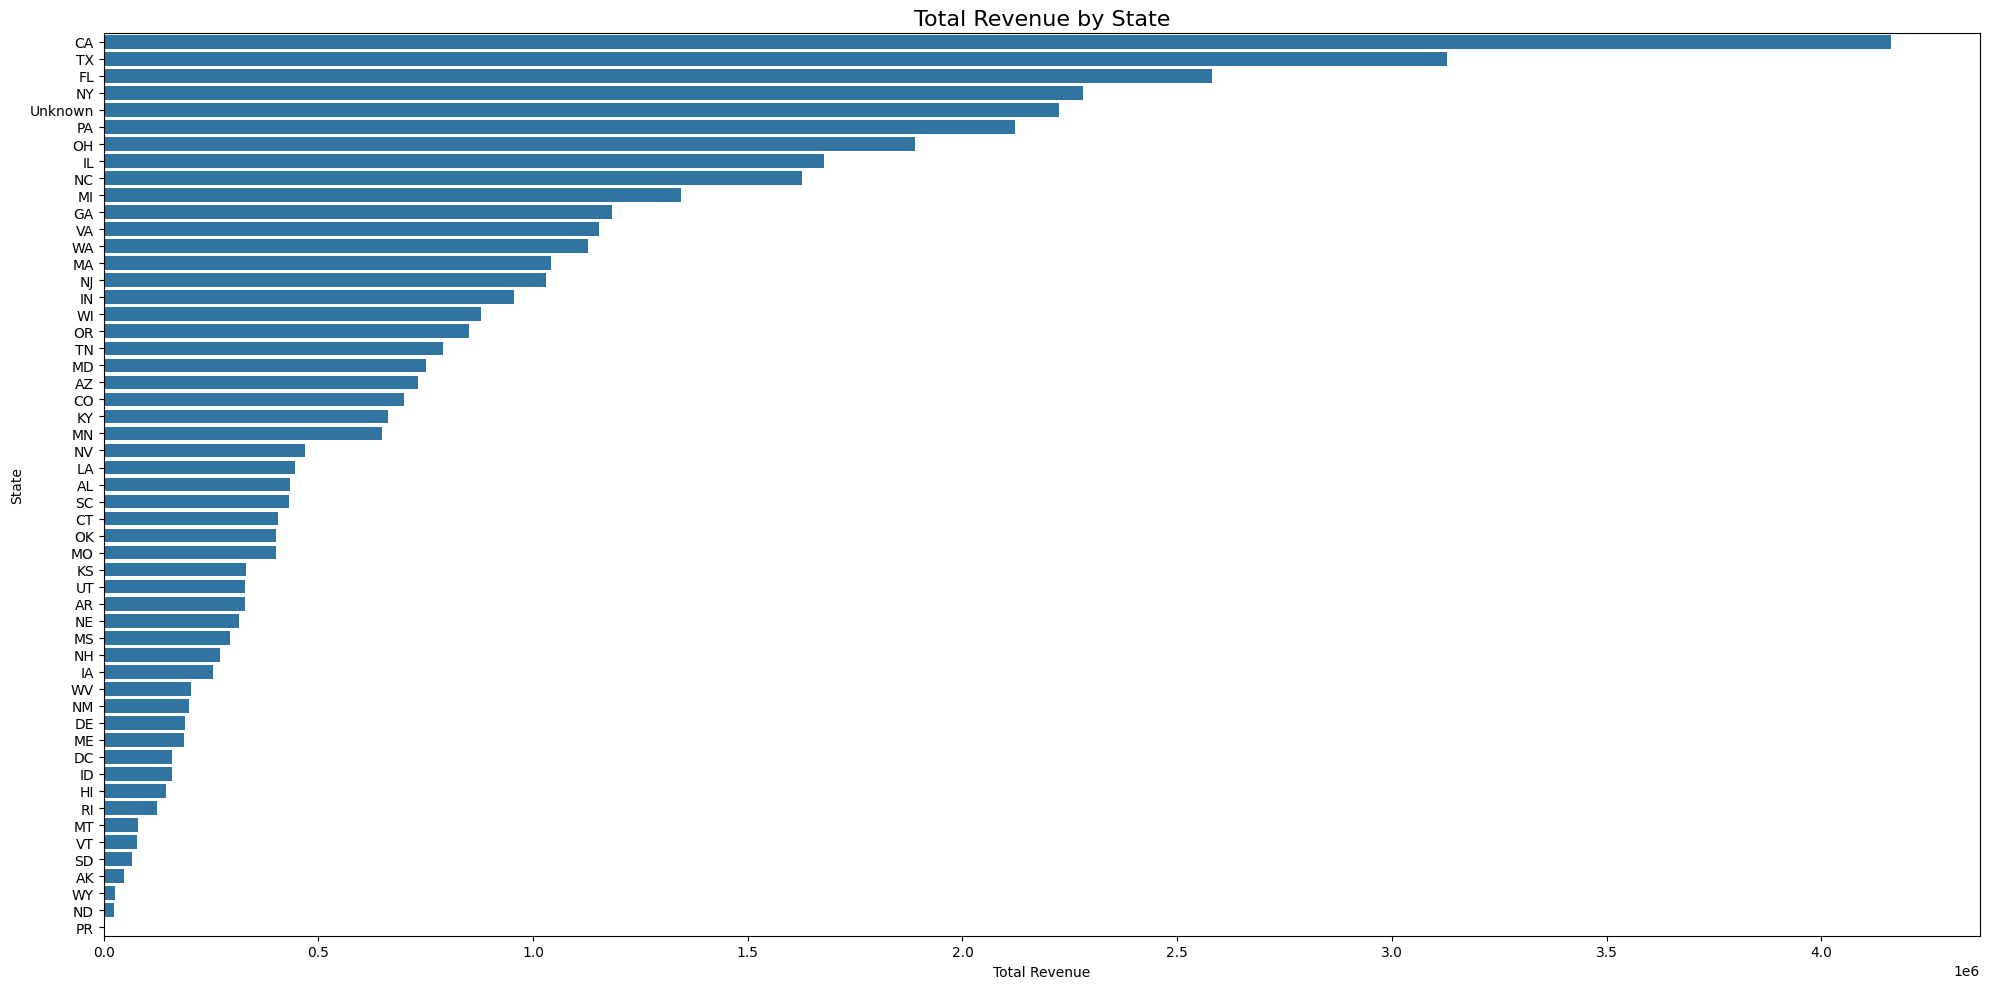

In [ ]:
# Relationship Between Customer Location and Purchase Behavior

from pyspark.sql.functions import col, sum

# Group purchases by state and total spend
state_revenue = merged_data.groupBy("Shipping Address State") \
    .agg(sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalRevenue")) \
    .orderBy(col("TotalRevenue").desc())

# Convert to Pandas for visualisation
state_revenue_pd = state_revenue.toPandas()

# Plot revenue by state
plt.figure(figsize=(20, 10))
sns.barplot(y="Shipping Address State", x="TotalRevenue", data=state_revenue_pd)
plt.title("Total Revenue by State", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#4. Customer Segmentation and Insights <font color = red>[45 marks]</font> <br>


## 4.1 Perform RFM Analysis <font color = red>[10 marks]</font> <br>

RFM Analysis is a powerful customer segmentation technique used to evaluate and quantify customer value based on three key dimensions:
- **Recency**,
- **Frequency**,
- **Monetary**.

This method is particularly effective in identifying high-value customers, optimizing marketing strategies, and improving customer retention in the e-commerce industry.


### 1. Recency (R)
Recency measures how recently a customer made a purchase Customers who have purchased more recently are more likely to respond to promotions and offers.
- **Application:** By ranking customers based on the number of days since their last transaction, you can prioritize those who are most engaged.

### 2. Frequency (F)
Frequency counts the number of purchases a customer has made over a given period.
Frequent purchasers tend to be more loyal and are often a source of recurring revenue.
- **Application:** Analyzing purchase frequency helps in identifying consistent buyers and understanding their buying patterns.

### 3. Monetary (M)
Monetary value represents the total amount of money a customer has spent.
Customers who spend more are often more profitable, making them ideal targets for retention and upsell strategies.
- **Application:** By assessing the monetary contribution, you can distinguish between high-value and low-value customers.


### Prepare data for RFM Analysis <font color = red>[2 marks]</font> <br>


In [ ]:
from pyspark.sql.functions import datediff, max, count, sum, lit

# Get the latest order date in the dataset
latest_date = merged_data.agg(max("Order Date")).collect()[0][0]

# Calculate RFM metrics
rfm_data = merged_data.groupBy("Survey ResponseID").agg(
    datediff(lit(latest_date), max("Order Date")).alias("Recency"),
    count("ASIN/ISBN (Product Code)").alias("Frequency"),
    sum(col("Purchase Price Per Unit") * col("Quantity")).alias("Monetary")
)

# Filter out customers with no purchases
rfm_data = rfm_data.filter(col("Frequency") > 0)

# Show RFM data
rfm_data.show()

+-----------------+-------+---------+------------------+
|Survey ResponseID|Recency|Frequency|          Monetary|
+-----------------+-------+---------+------------------+
|R_1mxX9jjBSLwxiDU|    524|      248|2765.2599999999998|
|R_1jO4s7oht3pyKEc|    518|      628|13287.830000000005|
|R_1eWdieBjoYJXAYv|    606|      965|27099.969999999976|
|R_1gG5xibh48txT6f|    523|      611|13311.660000000007|
|R_1esG9Jlh9NISLaO|    529|      368| 6881.200000000002|
|R_10TV1zyi4yCEEkl|    525|     1124|29788.359999999975|
|R_2cmFD4NTF42JLfH|    577|      447|14191.550000000003|
|R_297dOANqCntVXou|    600|      588|11329.400000000005|
|R_1l6oxKA9uiM9GUo|    632|      174|           5240.86|
|R_1CqGMkfiCiATbn4|    528|      183| 5691.150000000001|
|R_1li5HiNnFHiD7yw|    533|      158| 3317.170000000001|
|R_2c6ZPDvvitYUf1E|    651|       74|            1253.0|
|R_1QgWXnlpERvWjrY|    645|       89|1515.4099999999999|
|R_3GD1CL4OyjglmbZ|    516|      762|17599.070000000003|
|R_2dyITPHbbfmCXJn|    519|    

In [ ]:
from pyspark.sql.functions import log1p
from sklearn.preprocessing import StandardScaler

# Apply log transformation to skewed features
rfm_data_transformed = rfm_data.withColumn("Recency_log", log1p(col("Recency"))) \
                               .withColumn("Frequency_log", log1p(col("Frequency"))) \
                               .withColumn("Monetary_log", log1p(col("Monetary")))


feature_cols = ["Recency_log", "Frequency_log", "Monetary_log"]
rfm_data_scaled = rfm_data_transformed.select(feature_cols)


# Convert to Pandas DataFrame (for scikit-learn compatibility)
rfm_data_scaled_pd = rfm_data_scaled.toPandas()


# Scale features using StandardScaler
scaler = StandardScaler()
rfm_scaled_features = scaler.fit_transform(rfm_data_scaled_pd)

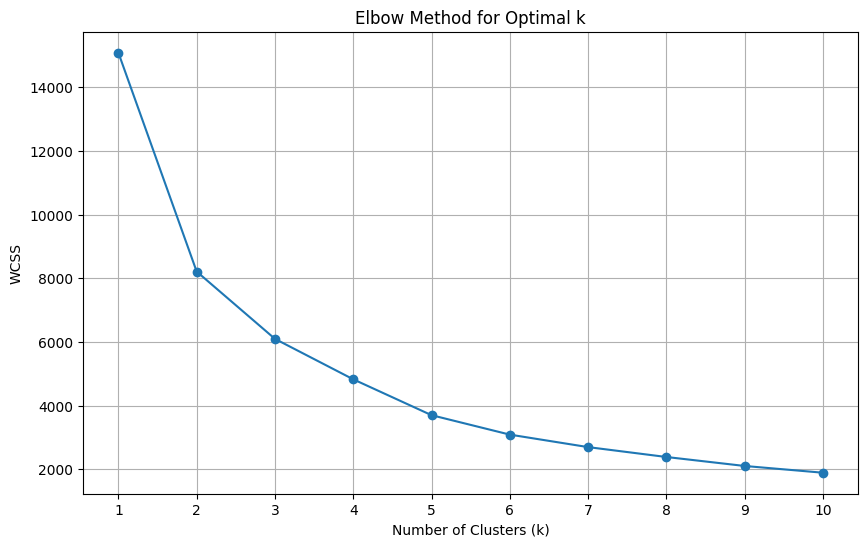

In [ ]:
from sklearn.cluster import KMeans

# Calculate the Within-Cluster Sum of Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve with the number of clusters on the x-axis and WCSS on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 3

# Fit the K-Means model using the optimal number of clusters obtained after understanding the elblow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(rfm_scaled_features)
cluster_labels = kmeans.labels_

# Add the assigned cluster labels to the Pandas DataFrame and convert back to PySpark
rfm_data_scaled_pd['Cluster'] = cluster_labels

rfm_clustered = spark.createDataFrame(rfm_data_scaled_pd)

# Display the clustered data
rfm_clustered.show()

+------------------+------------------+------------------+-------+
|       Recency_log|     Frequency_log|      Monetary_log|Cluster|
+------------------+------------------+------------------+-------+
| 6.263398262591624| 5.517452896464707|7.9252515063609845|      1|
| 6.251903883165888| 6.444131256700441| 9.494679111714504|      0|
| 6.408528791059498| 6.873163834212518|10.207324799585159|      0|
| 6.261491684321042| 6.416732282512326|   9.4964707411589|      0|
| 6.272877006546167| 5.910796644040527| 8.836693647254538|      0|
|  6.26530121273771| 7.025538314638521| 10.30190656175718|      0|
| 6.359573868672378| 6.104793232414985| 9.560472458026169|      0|
| 6.398594934535208|6.3784261836515865| 9.335244657900187|      0|
| 6.450470422144176|5.1647859739235145| 8.564431676163101|      1|
| 6.270988431858299| 5.214935757608986|  8.64684331163834|      0|
| 6.280395838960195|5.0689042022202315| 8.107168705122035|      1|
| 6.480044561926653|  4.31748811353631| 7.134093721192866|    

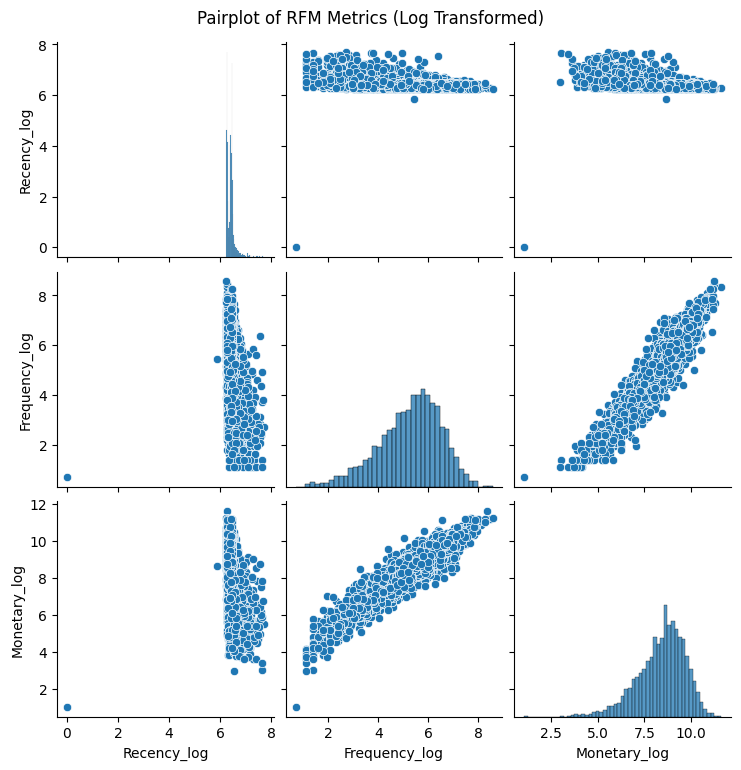

In [ ]:
# Convert the full RFM dataset from PySpark DataFrame to Pandas DataFrame for visualisation
rfm_data_pd = rfm_data_transformed.toPandas()

# Generate a pairplot to visualise the relationships between the numeric RFM columns
sns.pairplot(rfm_data_pd[['Recency_log', 'Frequency_log', 'Monetary_log']])
plt.suptitle('Pairplot of RFM Metrics (Log Transformed)', y=1.02)
plt.show()

### Behavioral Trends Analysis <font color = red>[8 marks]</font> <br>

Perform RFM analysis to study the behavior of customers to tailor marketing strategies

In [ ]:
# Import necessary PySpark functions for data processing
from pyspark.sql.functions import datediff, max

# Get the latest order date in the dataset
latest_date = merged_data.agg(max("Order Date")).collect()[0][0]

# Group the dataset by 'Survey ResponseID' to calculate RFM (Recency, Frequency, Monetary) metrics
rfm_behavior_data = merged_data.groupBy("Survey ResponseID").agg(
    datediff(lit(latest_date), max("Order Date")).alias("Recency"),
    count("ASIN/ISBN (Product Code)").alias("Frequency"),
    sum(col("Purchase Price Per Unit") * col("Quantity")).alias("Monetary")
)

# Filter out customers with no purchases
rfm_behavior_data = rfm_behavior_data.filter(col("Frequency") > 0)

# Convert the processed RFM dataset to Pandas for sklearn compatibility for clustering
rfm_behavior_data_pd = rfm_behavior_data.toPandas()

# Display the first few rows of the behavioral RFM data
print("Behavioral RFM Data:")
print(rfm_behavior_data_pd.head())

Behavioral RFM Data:
   Survey ResponseID  Recency  Frequency  Monetary
0  R_1mxX9jjBSLwxiDU      524        248   2765.26
1  R_1jO4s7oht3pyKEc      518        628  13287.83
2  R_1eWdieBjoYJXAYv      606        965  27099.97
3  R_1gG5xibh48txT6f      523        611  13311.66
4  R_1esG9Jlh9NISLaO      529        368   6881.20


In [ ]:
# Apply K-Means clustering

from sklearn.cluster import KMeans

# Fit the K-Means model and predict cluster labels for each customer
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(rfm_behavior_data_pd[['Recency', 'Frequency', 'Monetary']])

# Add the predicted cluster labels to the Pandas DataFrame
rfm_behavior_data_pd['Cluster'] = cluster_labels

# Convert the Pandas DataFrame back to a PySpark DataFrame
rfm_behavior_clustered = spark.createDataFrame(rfm_behavior_data_pd)

# Display the clustered data
rfm_behavior_clustered.show()

+-----------------+-------+---------+------------------+-------+
|Survey ResponseID|Recency|Frequency|          Monetary|Cluster|
+-----------------+-------+---------+------------------+-------+
|R_1mxX9jjBSLwxiDU|    524|      248|2765.2599999999998|      0|
|R_1jO4s7oht3pyKEc|    518|      628|13287.830000000005|      1|
|R_1eWdieBjoYJXAYv|    606|      965|27099.969999999976|      2|
|R_1gG5xibh48txT6f|    523|      611|13311.660000000007|      1|
|R_1esG9Jlh9NISLaO|    529|      368| 6881.200000000002|      0|
|R_10TV1zyi4yCEEkl|    525|     1124|29788.359999999975|      2|
|R_2cmFD4NTF42JLfH|    577|      447|14191.550000000003|      1|
|R_297dOANqCntVXou|    600|      588|11329.400000000005|      1|
|R_1l6oxKA9uiM9GUo|    632|      174|           5240.86|      0|
|R_1CqGMkfiCiATbn4|    528|      183| 5691.150000000001|      0|
|R_1li5HiNnFHiD7yw|    533|      158| 3317.170000000001|      0|
|R_2c6ZPDvvitYUf1E|    651|       74|            1253.0|      0|
|R_1QgWXnlpERvWjrY|    64

Analyse the Cluster Distribution by Income <font color = red>[2 marks]</font> <br>


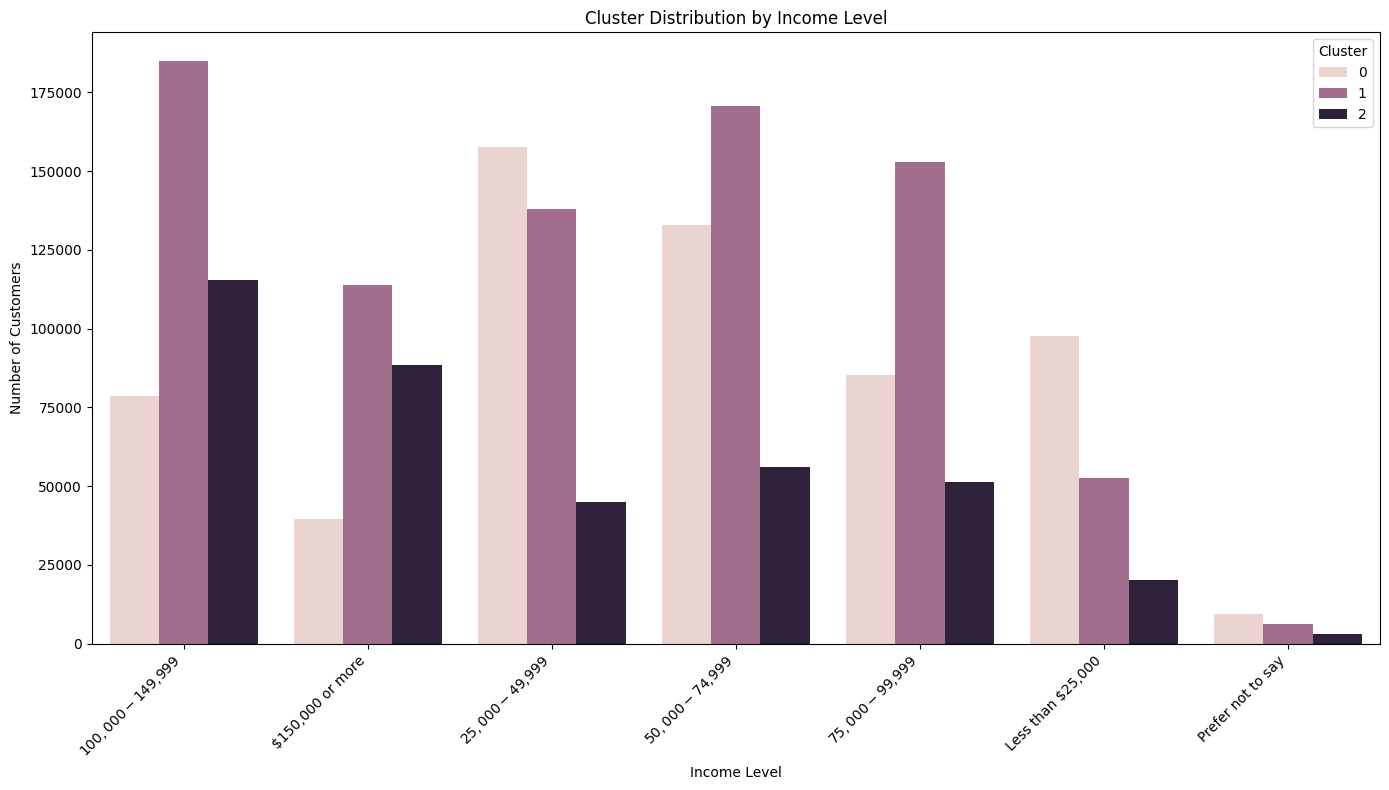

In [ ]:
#Trend 1: Cluster Distribution by Income

# Import the necessary function for counting records in PySpark
from pyspark.sql.functions import count

# Join the RFM dataset with the survey dataset using a common key
cluster_income_data = rfm_behavior_clustered.join(merged_data, on='Survey ResponseID', how='inner')

# Aggregate data to count the number of customers per Cluster-Income group
cluster_income_distribution = cluster_income_data.groupBy("Cluster", "Q-demos-income").agg(count("*").alias("CustomerCount")).orderBy("Cluster", "Q-demos-income")

# Convert the aggregated data from PySpark DataFrame to Pandas DataFrame for visualisation
cluster_income_distribution_pd = cluster_income_distribution.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Q-demos-income', y='CustomerCount', hue='Cluster', data=cluster_income_distribution_pd)
plt.title('Cluster Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analyse the Average Spending by Cluster <font color = red>[2 marks]</font> <br>


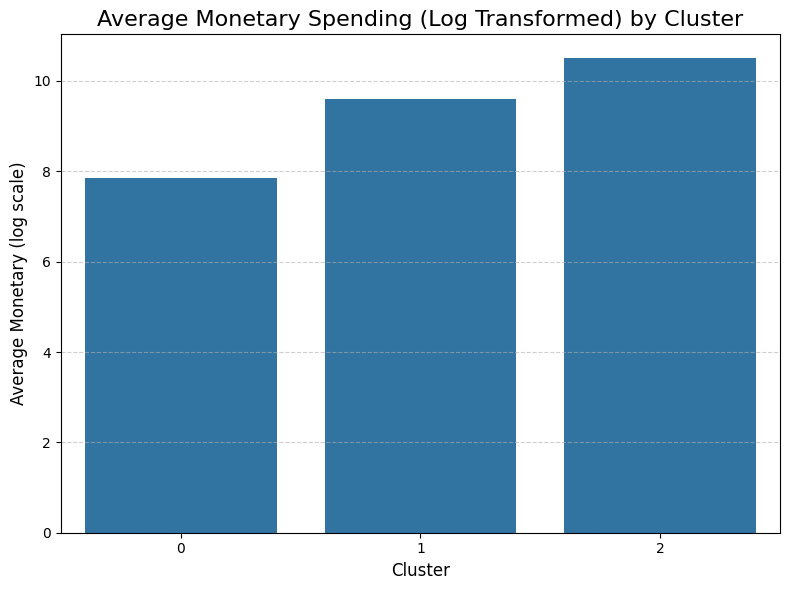

In [ ]:
#Trend 2: Average Spending by Cluster

# Import the required function for calculating averages in PySpark
from pyspark.sql.functions import avg, col

# Compute the average values of 'Recency_log', 'Frequency', and 'Monetary_log' for each customer cluster

rfm_behavior_clustered = (
    rfm_behavior_clustered
    .withColumn("Recency_log", log1p(col("Recency")))
    .withColumn("Monetary_log", log1p(col("Monetary")))
)


cluster_summary = (
    rfm_behavior_clustered
    .groupBy("Cluster")
    .agg(
        avg("Recency_log").alias("Avg_Recency_log"),
        avg("Frequency").alias("Avg_Frequency"),
        avg("Monetary_log").alias("Avg_Monetary_log")
    )
    .orderBy("Cluster")
)

# Convert the aggregated cluster summary from PySpark DataFrame to Pandas DataFrame for visualisation
cluster_summary_pd = cluster_summary.toPandas()

# Generate a bar plot to visualise the average monetary spending per cluster
plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_summary_pd, x='Cluster', y='Avg_Monetary_log')
plt.title('Average Monetary Spending (Log Transformed) by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Monetary (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Analyse the Purchase Frequency vs. Recency <font color = red>[2 marks]</font> <br>


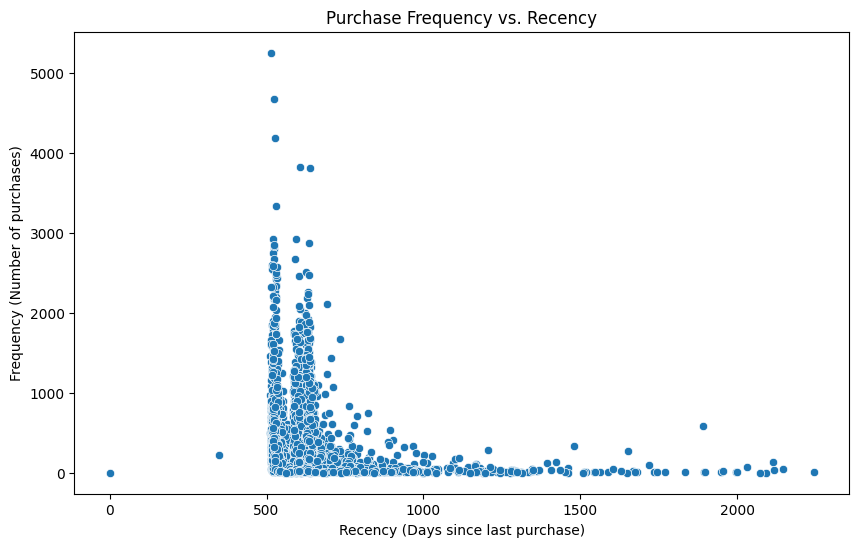

In [ ]:
#Trend 3: Purchase Frequency vs. Recency

# Convert the RFM dataset from PySpark DataFrame to Pandas DataFrame for visualisation
rfm_behavior_data_pd = rfm_behavior_data.toPandas()


# Generate a scatter plot to analyse the relationship between Purchase Frequency and Recency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm_behavior_data_pd)
plt.title('Purchase Frequency vs. Recency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of purchases)')
plt.show()

Analyse the top categories by clusters <font color = red>[2 marks]</font> <br>


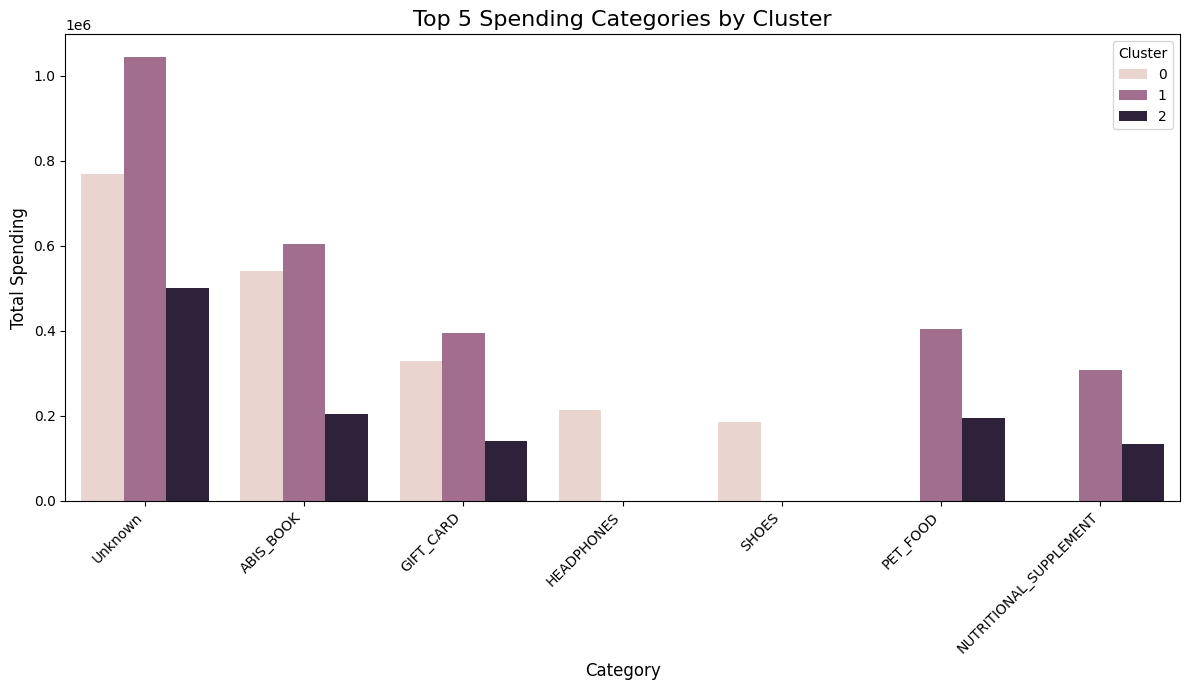

In [ ]:
#Trend 4: Top Categories by Cluster

# Import the necessary function to calculate the sum in PySpark
from pyspark.sql.functions import col, sum as spark_sum

# Join the merged dataset with the RFM dataset to associate each customer with their respective cluster
rfm_with_categories = rfm_behavior_clustered.join(
    merged_data.select("Survey ResponseID", "Category", "Purchase Price Per Unit", "Quantity"),
    on="Survey ResponseID",
    how="inner"
)

# Group the filtered data by 'Category' and compute the total spending in each category
category_spend = (
    rfm_with_categories
    .groupBy("Cluster", "Category")
    .agg(
        spark_sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalSpend")
    )
)

# Order the categories by total spending in descending order and select the top 5 highest spending categories
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

window_spec = Window.partitionBy("Cluster").orderBy(col("TotalSpend").desc())

top_categories = (
    category_spend
    .withColumn("rank", row_number().over(window_spec))
    .filter(col("rank") <= 5)
    .orderBy("Cluster", "rank")
)

# Convert the top categories dataset from PySpark DataFrame to Pandas DataFrame for visualisation
top_categories_pd = top_categories.toPandas()

# Plot the cluster
plt.figure(figsize=(12, 7))
sns.barplot(data=top_categories_pd, x="Category", y="TotalSpend", hue="Cluster")
plt.title("Top 5 Spending Categories by Cluster", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## 4.2 Insights <font color = red>[35 marks]</font> <br>


### 4.2.1 When to schedule effective promotions. <font color = red>[3 marks]</font> <br>

Compare sales across weekdays to schedule effective promotions

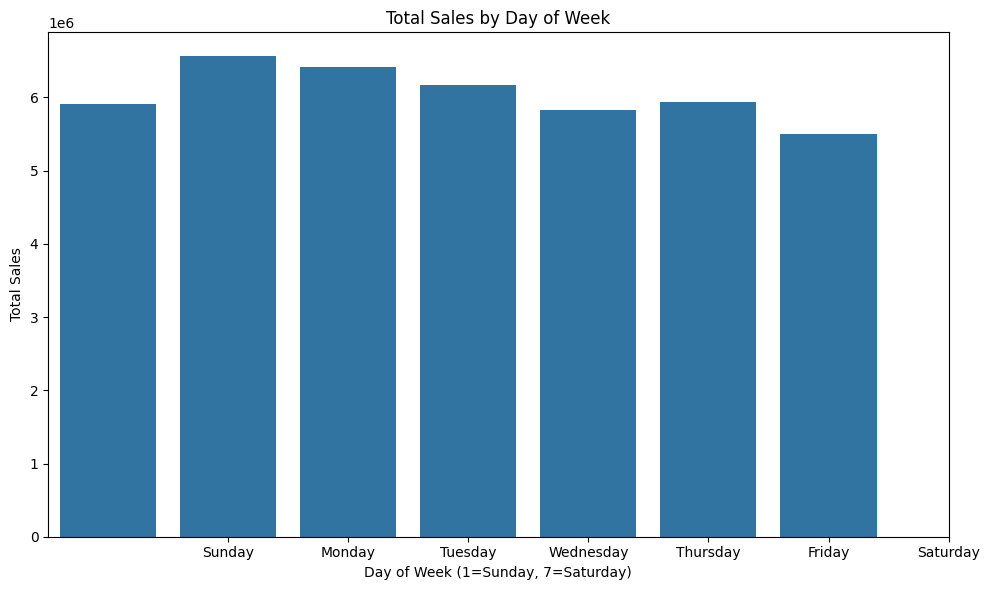

In [ ]:
#Compare sales across weekdays to schedule effective promotions

from pyspark.sql.functions import dayofweek

# Extract day of the week (1 = Sunday, 7 = Saturday)
weekday_sales = merged_data.withColumn("DayOfWeek", dayofweek("Order Date"))

# Group by weekday and sum total sales
weekday_sales_summary = weekday_sales.groupBy("DayOfWeek").agg(spark_sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalSales")).orderBy("DayOfWeek")

# Convert to Pandas for visualisation
weekday_sales_pd = weekday_sales_summary.toPandas()

# Plot sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TotalSales', data=weekday_sales_pd)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week (1=Sunday, 7=Saturday)')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 8), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.tight_layout()
plt.show()

### 4.2.2 Top-selling Products <font color = red>[2 marks]</font> <br>

Identify top-selling products by considering revenue and engagement metrics

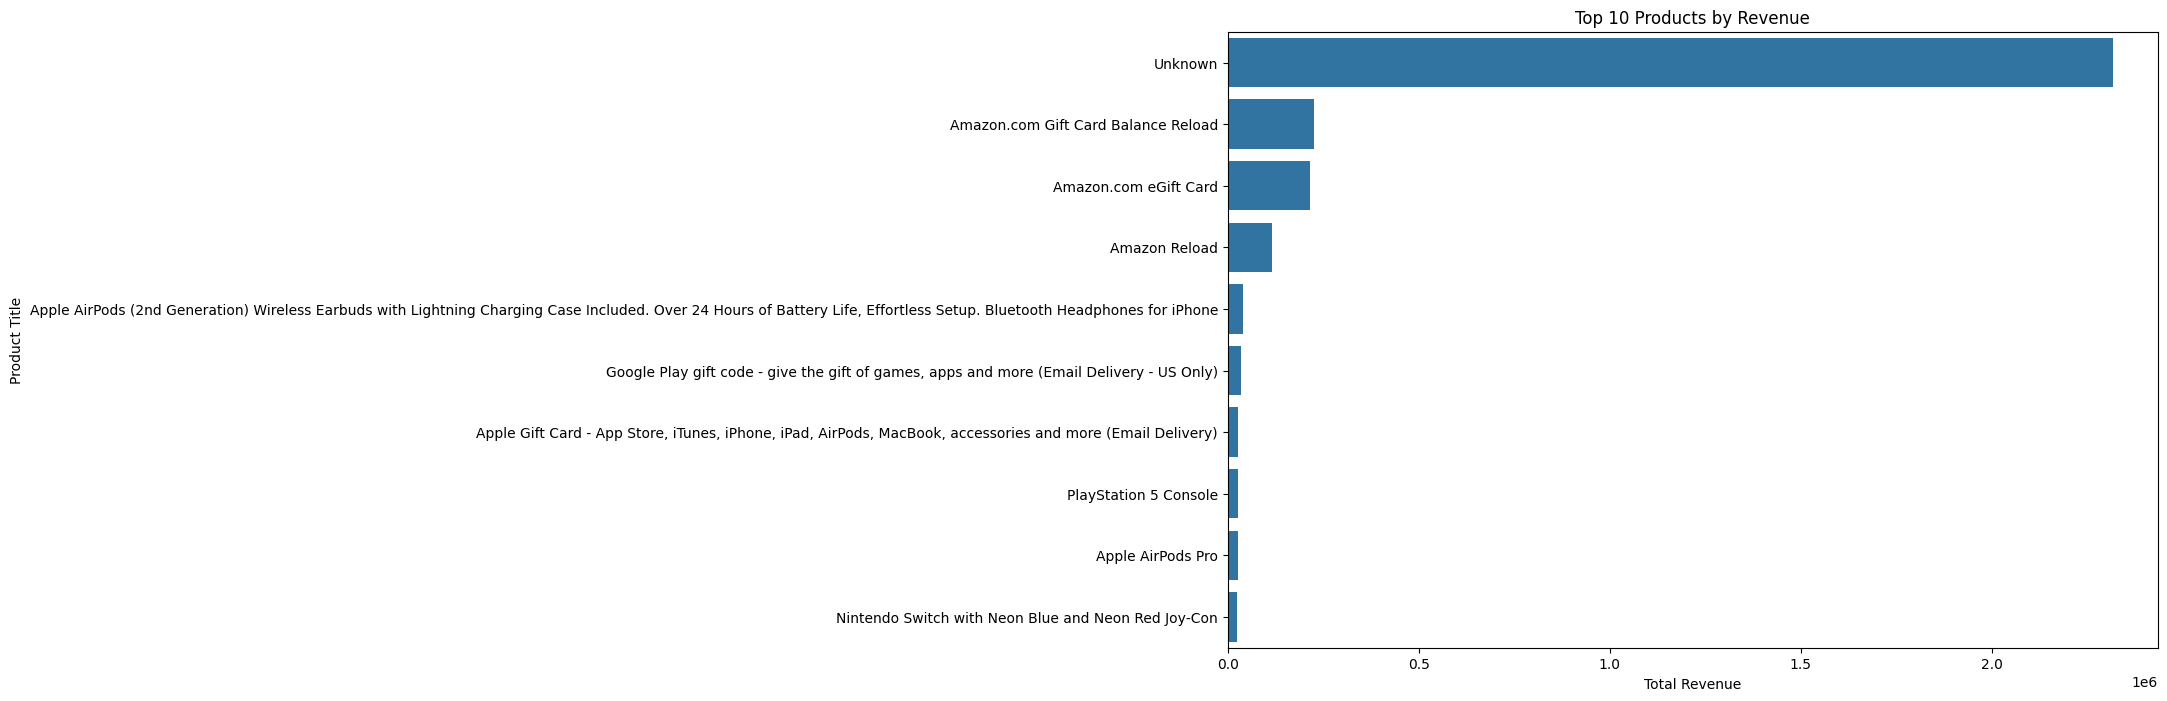

In [ ]:
#Identify top-selling products using revenue and engagement metrics

# Group by product and sum revenue
product_revenue = merged_data.groupBy("Title") \
    .agg(spark_sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalRevenue")) \
    .orderBy(col("TotalRevenue").desc())

# Get top 10 products by revenue
top_10_products_revenue = product_revenue.limit(10)

# Convert to Pandas for visualisation
top_10_products_revenue_pd = top_10_products_revenue.toPandas()

# Plot top products by revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalRevenue', y='Title', data=top_10_products_revenue_pd)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Title')
plt.show()

### 4.2.3 State-wise revenue Distribution <font color = red>[5 marks]</font> <br>

Assess state-wise revenue to focus on high-growth areas

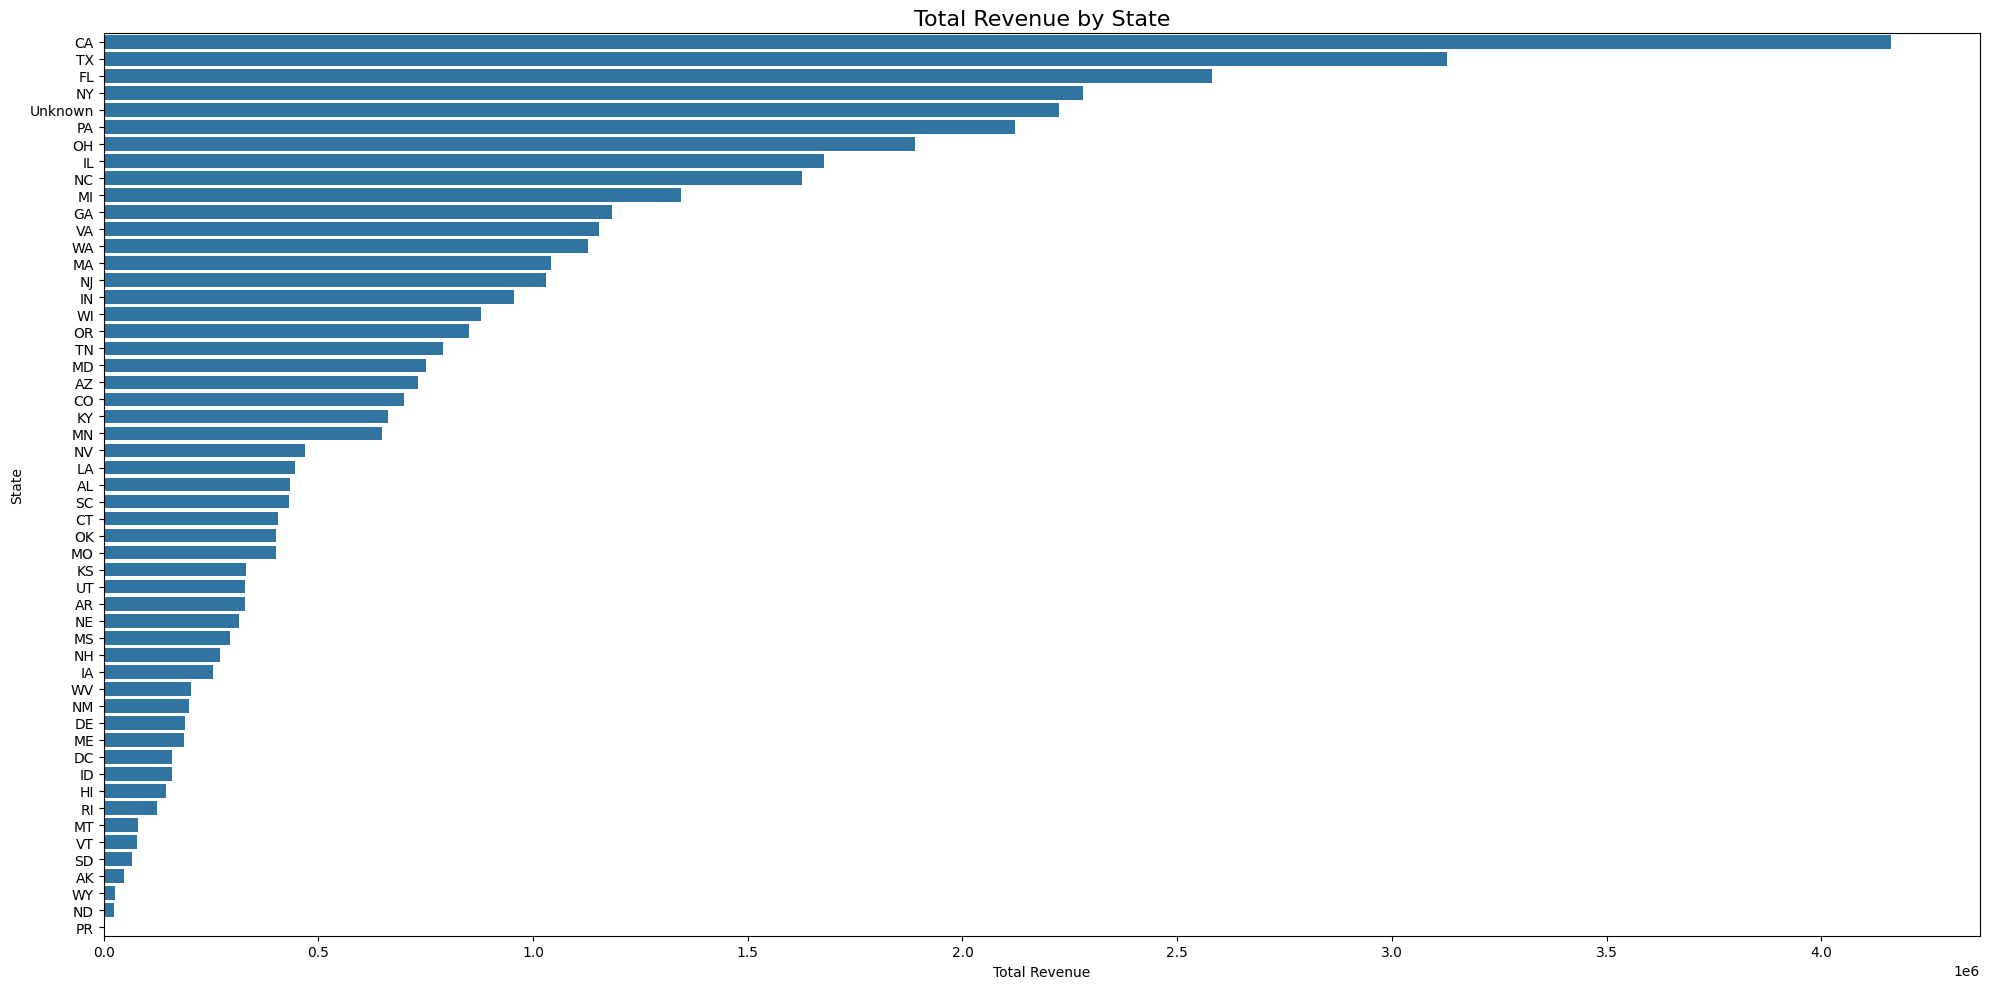

In [ ]:
#Assess state-wise revenue to focus on high-growth areas

# Group by state and sum revenue
state_revenue = merged_data.groupBy("Shipping Address State") \
    .agg(spark_sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalRevenue")) \
    .orderBy(col("TotalRevenue").desc())

# Convert to Pandas for visualisation
state_revenue_pd = state_revenue.toPandas()

# Plot revenue by state
plt.figure(figsize=(20, 10))
sns.barplot(y="Shipping Address State", x="TotalRevenue", data=state_revenue_pd)
plt.title("Total Revenue by State", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### 4.2.4 Repeat Purchase Behavior <font color = red>[5 marks]</font> <br>

Examine repeat purchase behavior to enhance retention initiatives.

In [ ]:
#Examine repeat purchase behavior to enhance retention initiatives

from pyspark.sql.functions import count, col

# Count total purchases per customer
purchase_counts = merged_data.groupBy("Survey ResponseID").agg(count("*").alias("TotalPurchases"))

# Filter for repeat customers (those with more than one purchase)
repeat_customers = purchase_counts.filter(col("TotalPurchases") > 1)

# Show sample data
print("Sample of Repeat Customers:")
repeat_customers.show(5)

print(f"Total number of repeat customers: {repeat_customers.count()}")

Sample of Repeat Customers:
+-----------------+--------------+
|Survey ResponseID|TotalPurchases|
+-----------------+--------------+
|R_1mxX9jjBSLwxiDU|           248|
|R_1jO4s7oht3pyKEc|           628|
|R_1eWdieBjoYJXAYv|           965|
|R_1gG5xibh48txT6f|           611|
|R_1esG9Jlh9NISLaO|           368|
+-----------------+--------------+
only showing top 5 rows

Total number of repeat customers: 5026


### 4.2.5 Flagging Potential Fraud <font color = red>[5 marks]</font> <br>

Identify irregular transaction patterns to flag potential fraud.

In [ ]:
#Identify irregular transaction patterns to flag potential fraud

from pyspark.sql.functions import col, avg, stddev

# Calculate the threshold for unusually high spending
transaction_spending = merged_data.withColumn("TotalTransactionSpend", col("Purchase Price Per Unit") * col("Quantity"))

agg_stats = transaction_spending.agg(avg("TotalTransactionSpend").alias("mean"), stddev("TotalTransactionSpend").alias("stddev")).collect()[0]
mean_spend = agg_stats["mean"]
stddev_spend = agg_stats["stddev"]

# Consider spending to be unusually high if the total spent is greater than the mean + 3 * std dev
fraud_threshold = mean_spend + 3 * stddev_spend
print(f"Fraud Threshold (Mean + 3*StdDev): {fraud_threshold}")

# Filter transactions that exceed the threshold
suspicious_transactions = transaction_spending.filter(col("TotalTransactionSpend") > fraud_threshold)

# Show suspicious transactions
print("Suspicious Transactions:")
suspicious_transactions.show()

Fraud Threshold (Mean + 3*StdDev): 165.44506329621572
Suspicious Transactions:
+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+--------------------+-------------+----------------+--------------------+--------------------+-------------------+--------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------------+--------------------+--------------------+---------------+------------+------------------+-----------+----------+--------------+--------------+---------------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|            Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|   Q-demos-education|     Q-demos-income|Q-demos-g

### 4.2.6 Demand Variations across product categories <font color = red>[5 marks]</font> <br>

Perform inventory management by monitoring demand variations across product categories.

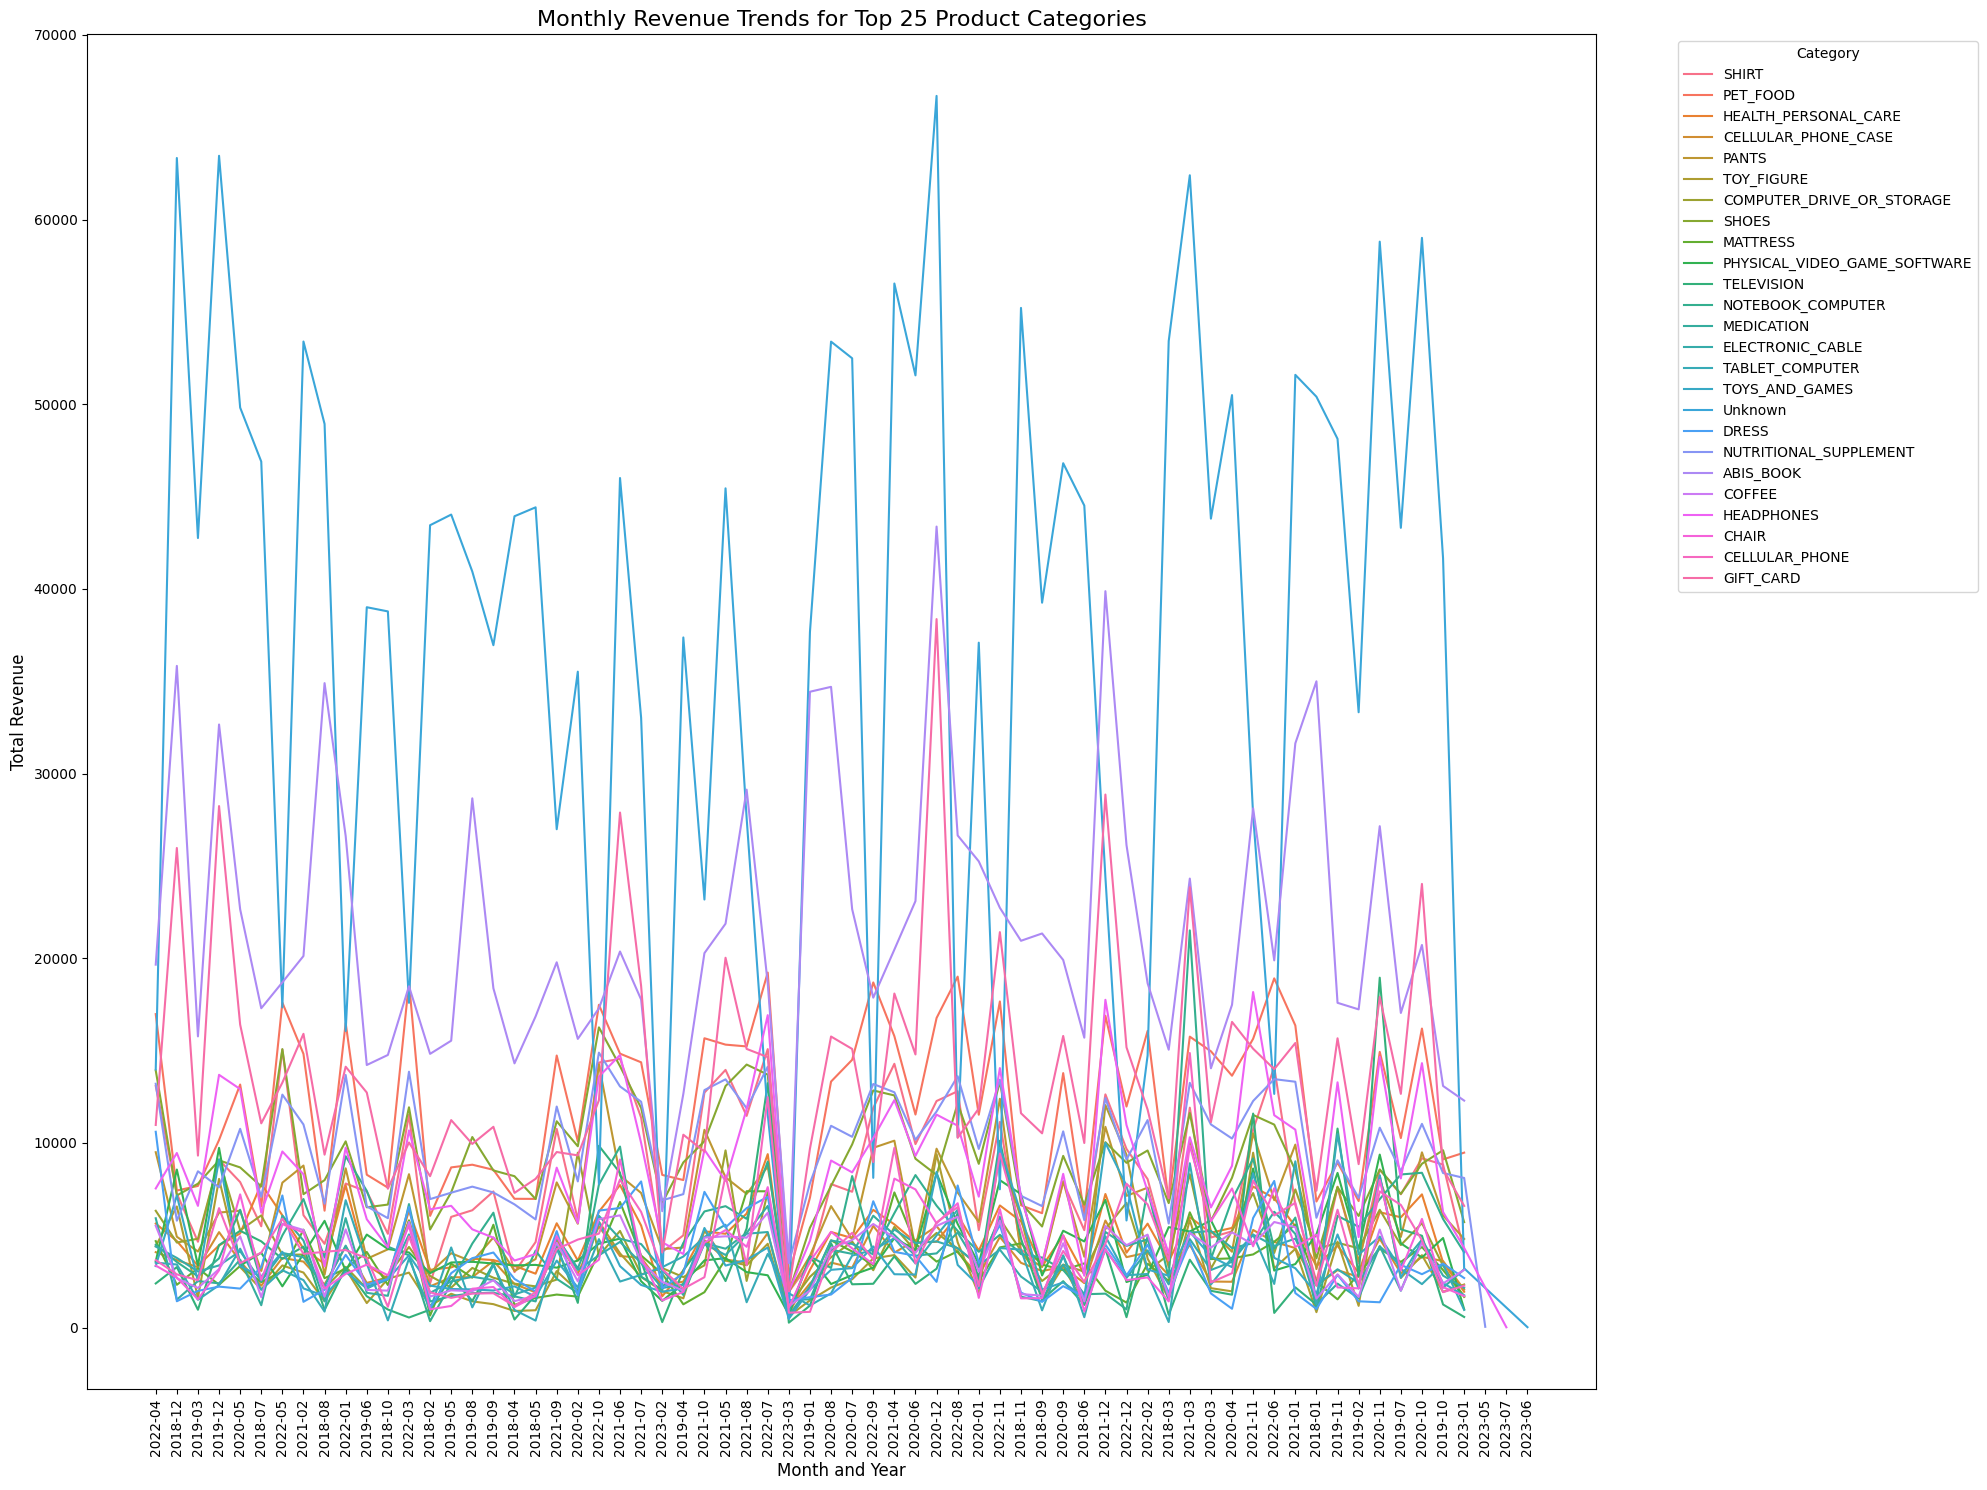

In [ ]:
#Monitor demand variations across product categories (Top 25) for inventory management

from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total revenue per transaction
with_revenue = merged_data.withColumn("Revenue", col("Purchase Price Per Unit") * col("Quantity"))

# Group by category and month, summing total revenue
category_monthly_revenue = with_revenue.groupBy("Category", date_format("Order Date", "yyyy-MM").alias("MonthYear")).agg(spark_sum("Revenue").alias("TotalRevenue"))

# Compute total revenue per category
category_total_revenue = with_revenue.groupBy("Category").agg(spark_sum("Revenue").alias("OverallRevenue")).orderBy(col("OverallRevenue").desc())

# Get the top 25 categories by total revenue
top_25_categories = category_total_revenue.limit(25).select("Category").rdd.flatMap(lambda x: x).collect()

# Filter category_trends to include only top 25 categories
category_trends_top_25 = category_monthly_revenue.filter(col("Category").isin(top_25_categories))

# Convert to Pandas for visualisation
category_trends_top_25_pd = category_trends_top_25.toPandas()

# Plot revenue trends for top 25 categories
plt.figure(figsize=(20, 15))
sns.lineplot(data=category_trends_top_25_pd, x="MonthYear", y="TotalRevenue", hue="Category")
plt.title("Monthly Revenue Trends for Top 25 Product Categories", fontsize=16)
plt.xlabel("Month and Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.2.7 Assess how bulk purchases affect revenue and supply chain operations <font color = red>[5 marks]</font> <br>

Analyse the impact of how bulk purchasing behavior affects revenue and the overall supply chain operations.

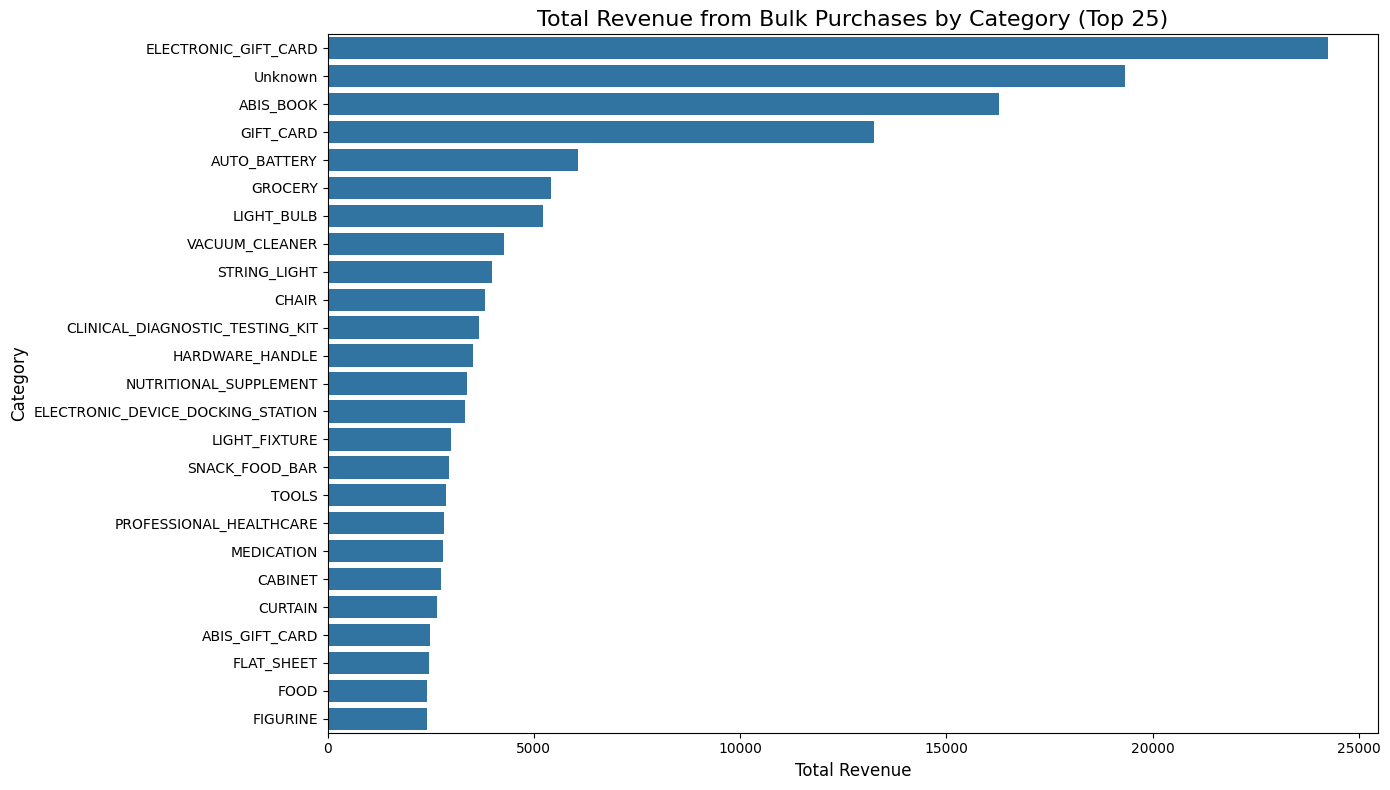

In [ ]:
#Assess how bulk purchases affect revenue and supply chain operations

# Filter bulk purchases (Quantity > 5) and compute total revenue per category
bulk_purchases = merged_data.filter(col("Quantity") > 5)

bulk_purchase_revenue = bulk_purchases.groupBy("Category").agg(spark_sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalRevenue"))

# Select the top 25 categories by total revenue
top_25_bulk_categories = bulk_purchase_revenue.orderBy(col("TotalRevenue").desc()).limit(25)

# Convert to Pandas for visualisation
top_25_bulk_categories_pd = top_25_bulk_categories.toPandas()

# Plot revenue from bulk purchases (Top 25 categories)
plt.figure(figsize=(14, 8))
sns.barplot(y="Category", x="TotalRevenue", data=top_25_bulk_categories_pd)
plt.title("Total Revenue from Bulk Purchases by Category (Top 25)", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

### 4.2.8 Compare lifecycle strategies <font color = red>[5 marks]</font> <br>

Compare new and established products to inform and compare lifecycle strategies to make informed decisions.

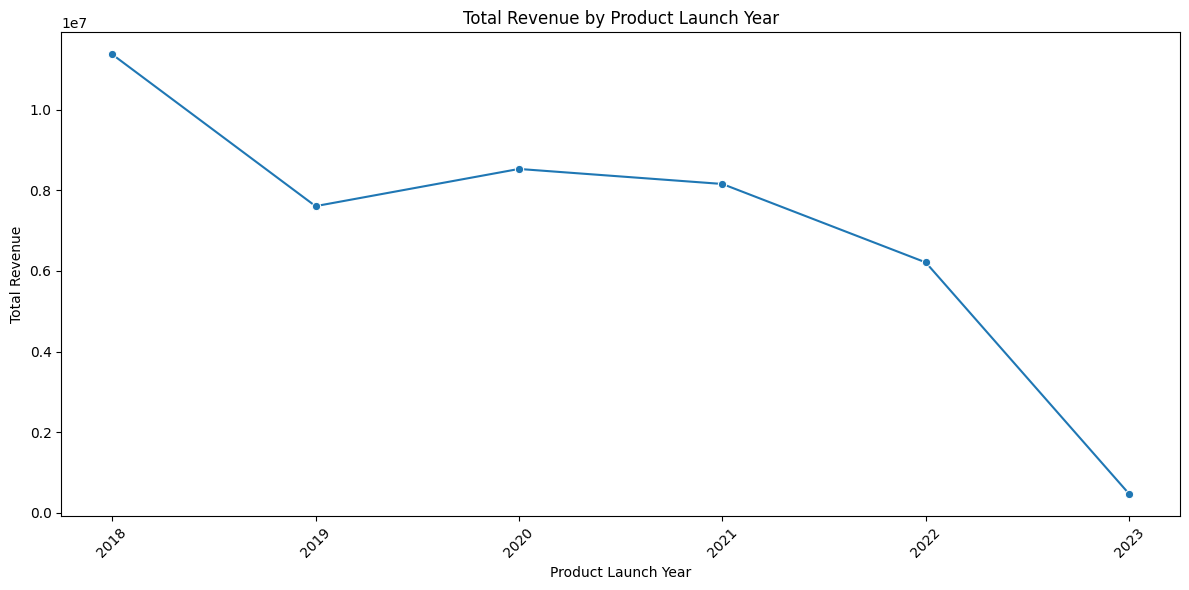

In [ ]:
#Compare new and established products to inform lifecycle strategies

from pyspark.sql.functions import min, sum

# Compute "Launch Year" as the first recorded sale year for each product
product_launch_year = merged_data.groupBy("ASIN/ISBN (Product Code)").agg(min(year("Order Date")).alias("LaunchYear"))

# Join this back to the main dataset
product_lifecycle_data = merged_data.join(product_launch_year, on="ASIN/ISBN (Product Code)", how="inner")

# Compute "Launch Year" as the first recorded sale year for each product
revenue_by_launch_year = product_lifecycle_data.groupBy("LaunchYear").agg(spark_sum(col("Purchase Price Per Unit") * col("Quantity")).alias("TotalRevenue")).orderBy("LaunchYear")

# Convert to Pandas
revenue_by_launch_year_pd = revenue_by_launch_year.toPandas()

# Plot revenue vs. launch year
plt.figure(figsize=(12, 6))
sns.lineplot(x='LaunchYear', y='TotalRevenue', data=revenue_by_launch_year_pd, marker='o')
plt.title('Total Revenue by Product Launch Year')
plt.xlabel('Product Launch Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#5 Conclusion <font color = red>[10 marks]</font> <br>


Based on the analysis performed, here are some key findings:

*   **Seasonal Trends:** Purchases and revenue show distinct seasonal patterns, with peaks likely corresponding to holidays or promotional periods.
*   **Customer Demographics:** Certain demographic groups show higher purchase frequency and spending.
*   **Weekday vs. Weekend:** There is a clear difference in purchasing behavior between weekdays and weekends.
*   **Product Performance:** Identifying top-selling products and categories is crucial for inventory management and marketing strategies.
*   **Geographical Distribution:** State-wise analysis helps in understanding regional demand and focusing efforts on high-growth areas.
*   **Repeat Purchases:** A significant portion of customers are repeat buyers, highlighting the importance of retention strategies.
*   **Potential Fraud:** Identifying unusual transaction patterns can help in flagging potential fraudulent activities.
*   **Bulk Purchases:** Analyzing bulk purchases can inform supply chain and pricing strategies.
*   **Product Lifecycle:** Understanding the revenue generated by products based on their launch year can guide product development and marketing.

In conclusion, this analysis provides valuable insights into customer behavior, product performance, and market trends, which can be leveraged to optimize business strategies and drive growth.